In [3]:
!pip install plotly


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 1.0 MB/s eta 0:00:09
   --- ------------------------------------ 0.8/9.6 MB 1.2 MB/s eta 0:00:08
   ----- ---------------------------------- 1.3/9.6 MB 1.4 MB/s eta 0:00:07
   ------ --------------------------------- 1.6/9.6 MB 1.3 MB/s eta 0:00:06
   -------- ------------------------------- 2.1/9.6 MB 1.4 MB/s eta 0:00:06
   --------- ------------------------------ 2.4/9.6 MB 1.4 MB/s eta 0:00:06
   ----------- ---------------------------- 2.9/9.6 MB 1.5 MB/s eta 0:00:05
   -------------- ------------------------- 3.4/9.6 MB 1.6 MB/s eta 0:00:04
   --------------- ------------------------ 3.7


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# =============================================================================
# EMERGENCYFLOW: OPTIMIZING EMERGENCY RESPONSE TIME IN RWANDA
# =============================================================================
# 🩺 Project Title: EmergencyFlow - Optimizing Emergency Response Time in Rwanda
# 🔖 Subtitle: Reducing Ambulance Delays by Analyzing Traffic, Location, and Population Data
# ❓ Problem Statement: Emergency ambulances in Rwanda are often delayed due to 
#    traffic congestion and poor route optimization, putting lives at risk.
# =============================================================================

# =============================================================================
# STEP 1: INSTALL AND IMPORT REQUIRED LIBRARIES
# =============================================================================
# Install required packages (run these in your Jupyter notebook)
# !pip install pandas numpy matplotlib seaborn scikit-learn plotly

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print("🚀 Starting EmergencyFlow Analysis...")

✅ All libraries imported successfully!
🚀 Starting EmergencyFlow Analysis...


In [7]:
# =============================================================================
# STEP 2: LOAD AND EXPLORE THE DATASET
# =============================================================================
print("\n" + "="*60)
print("📂 LOADING DATASET")
print("="*60)

# Load the CSV
df = pd.read_csv("emergencyflow_rwanda_expanded.csv")

# View basic info
print("📊 Dataset Info:")
print(df.info())

print(f"\n📏 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")

print("\n🧾 Available Columns in Dataset:")
print(df.columns.tolist())

# Display first few rows
print("\n👀 First 5 rows of the dataset:")
print(df.head())

# Display last few rows
print("\n👀 Last 5 rows of the dataset:")
print(df.tail())

# Basic descriptive statistics
print("\n📈 Descriptive Statistics:")
print(df.describe())



📂 LOADING DATASET
📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     245 non-null    object 
 1   Region                      245 non-null    object 
 2   Year                        245 non-null    int64  
 3   Latitude                    245 non-null    float64
 4   Longitude                   245 non-null    float64
 5   Traffic_Congestion_Index    245 non-null    float64
 6   Dispatch_Time_Min           245 non-null    float64
 7   Response_Time_Min           245 non-null    float64
 8   Ambulance_Calls             245 non-null    int64  
 9   Road_Accidents              245 non-null    int64  
 10  Population_Density_per_km2  245 non-null    float64
 11  Hospital_Nearby             245 non-null    object 
 12  Avg_Traffic_Speed_kmph      245 non-null    float64
 13  

In [8]:
# =============================================================================
# STEP 3: DATA QUALITY ASSESSMENT
# =============================================================================
print("\n" + "="*60)
print("🔍 DATA QUALITY ASSESSMENT")
print("="*60)

# Check for missing values
print("❌ Missing Values Analysis:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})
print(missing_info[missing_info['Missing Count'] > 0])

if missing_info['Missing Count'].sum() == 0:
    print("✅ No missing values found - dataset is clean!")

# Check data types
print("\n📝 Data Types:")
print(df.dtypes)

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔄 Duplicate rows: {duplicates}")

# Unique values in categorical columns
print("\n🏷️ Unique values in key columns:")
categorical_cols = ['Country', 'Region', 'Hospital_Nearby', 'Sector']
for col in categorical_cols:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} unique values")
        if df[col].nunique() <= 10:
            print(f"   Values: {df[col].unique()}")
        else:
            print(f"   Sample values: {df[col].unique()[:10]}...")

# Year range analysis
print(f"\n📅 Data covers years: {df['Year'].min()} to {df['Year'].max()}")
print(f"📊 Data spans {df['Year'].max() - df['Year'].min() + 1} years")


🔍 DATA QUALITY ASSESSMENT
❌ Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []
✅ No missing values found - dataset is clean!

📝 Data Types:
Country                        object
Region                         object
Year                            int64
Latitude                      float64
Longitude                     float64
Traffic_Congestion_Index      float64
Dispatch_Time_Min             float64
Response_Time_Min             float64
Ambulance_Calls                 int64
Road_Accidents                  int64
Population_Density_per_km2    float64
Hospital_Nearby                object
Avg_Traffic_Speed_kmph        float64
Road_Quality_Index            float64
Emergency_Staff_Available       int64
GPS_Accuracy_m                float64
Sector                         object
dtype: object

🔄 Duplicate rows: 0

🏷️ Unique values in key columns:
Country: 1 unique values
   Values: ['Rwanda']
Region: 3 unique values
   Values: ['Gasabo' 'Kicuki

In [9]:
# =============================================================================
# STEP 4: CLEAN & PREPROCESS THE DATASET
# =============================================================================
print("\n" + "="*60)
print("🧹 DATA CLEANING & PREPROCESSING")
print("="*60)

# Create a copy for cleaning
df_clean = df.copy()

# Handle missing values (if any)
if df_clean.isnull().sum().sum() > 0:
    print("🔧 Handling missing values...")
    # Fill numerical columns with median
    numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].median(), inplace=True)
    
    # Fill categorical columns with mode
    categorical_cols = df_clean.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)
    
    print("✅ Missing values handled successfully!")
else:
    print("✅ No missing values found - dataset is clean!")

# Remove duplicates if any
if duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"🗑️ Removed {duplicates} duplicate rows")

# Data type optimization
print("\n🔧 Optimizing data types...")

# Convert categorical variables to category type for memory efficiency
categorical_columns = ['Country', 'Region', 'Hospital_Nearby', 'Sector']
for col in categorical_columns:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')

print("✅ Data types optimized!")

# Create additional features for analysis
print("\n🛠️ Creating additional features...")

# Response time categories
df_clean['Response_Category'] = pd.cut(df_clean['Response_Time_Min'], 
                                     bins=[0, 15, 25, 35, float('inf')], 
                                     labels=['Excellent', 'Good', 'Average', 'Poor'])

# Traffic congestion categories  
df_clean['Traffic_Category'] = pd.cut(df_clean['Traffic_Congestion_Index'], 
                                    bins=[0, 0.3, 0.6, 0.8, 1.0], 
                                    labels=['Low', 'Medium', 'High', 'Critical'])

# Total response time (Dispatch + Response)
df_clean['Total_Response_Time'] = df_clean['Dispatch_Time_Min'] + df_clean['Response_Time_Min']

# Population density categories
df_clean['Population_Category'] = pd.cut(df_clean['Population_Density_per_km2'], 
                                        bins=[0, 3000, 7000, 10000, float('inf')], 
                                        labels=['Low', 'Medium', 'High', 'Very High'])

# Road quality categories
df_clean['Road_Quality_Category'] = pd.cut(df_clean['Road_Quality_Index'], 
                                         bins=[0, 0.3, 0.6, 0.8, 1.0], 
                                         labels=['Poor', 'Fair', 'Good', 'Excellent'])

print("✅ Additional features created!")

print(f"\n📏 Cleaned Dataset Shape: {df_clean.shape[0]} rows × {df_clean.shape[1]} columns")



🧹 DATA CLEANING & PREPROCESSING
✅ No missing values found - dataset is clean!

🔧 Optimizing data types...
✅ Data types optimized!

🛠️ Creating additional features...
✅ Additional features created!

📏 Cleaned Dataset Shape: 245 rows × 22 columns



📊 EXPLORATORY DATA ANALYSIS - OVERVIEW


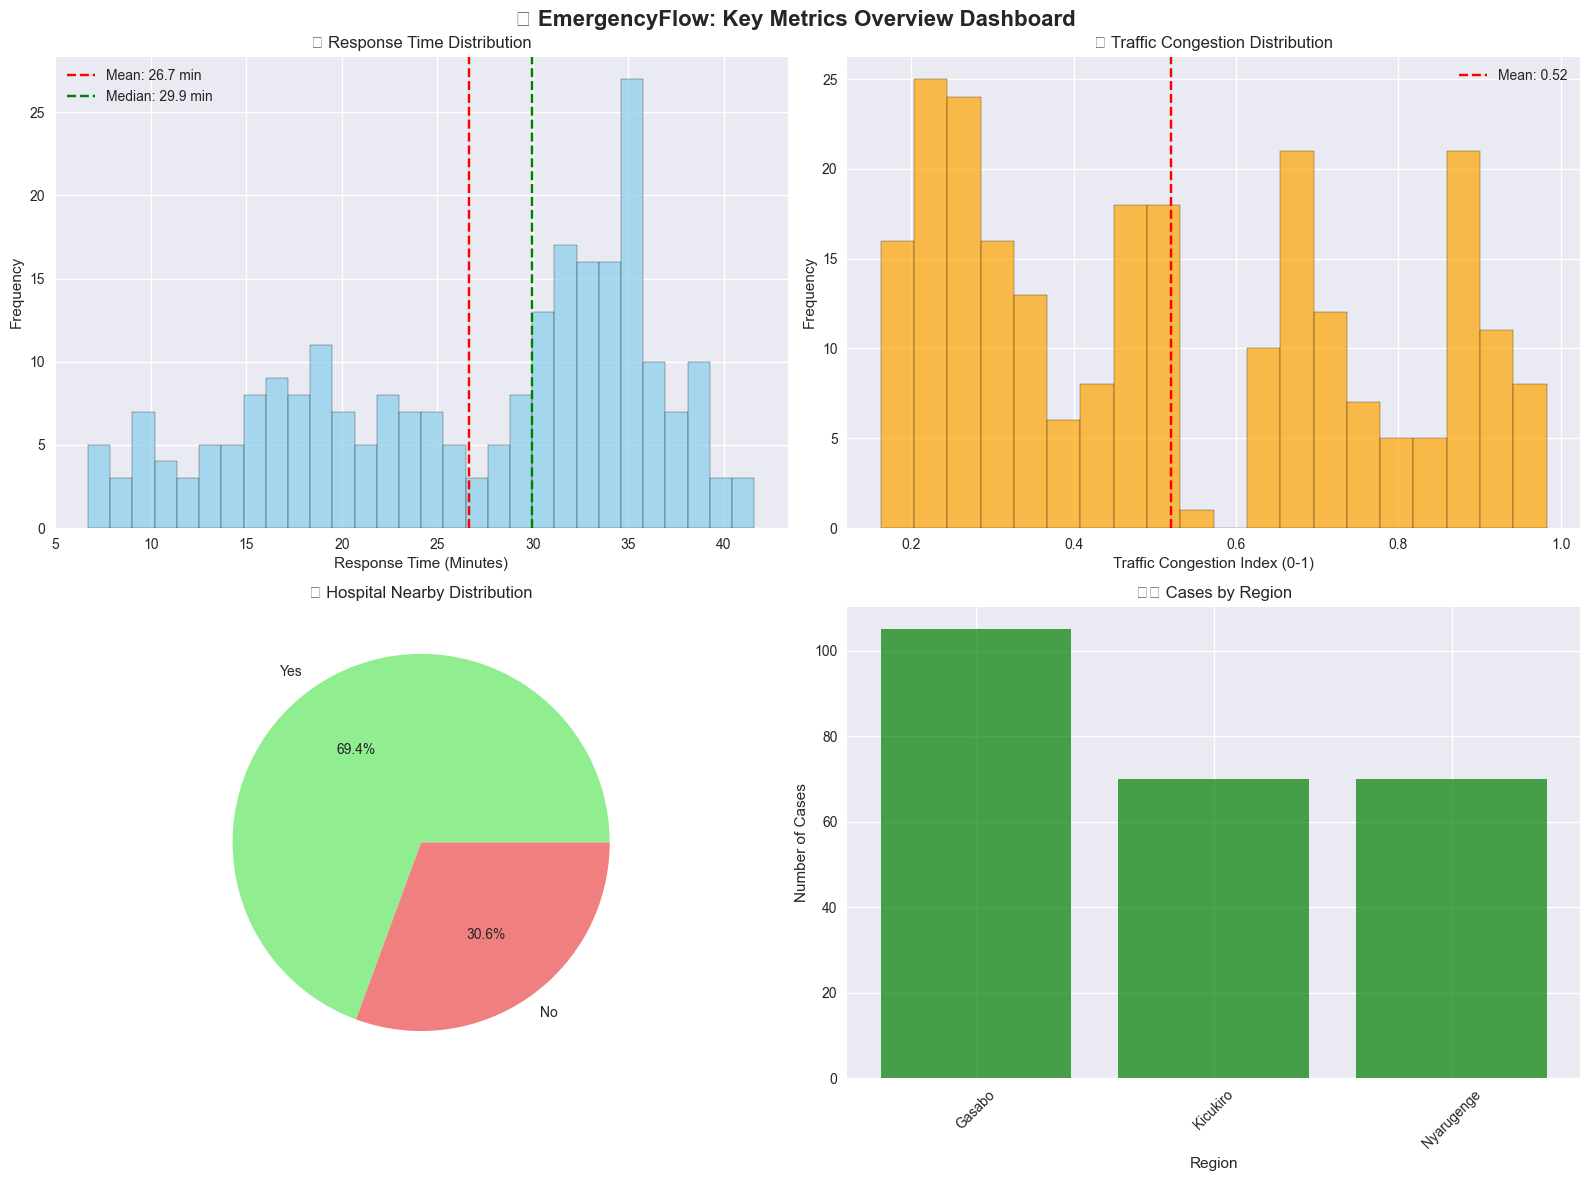


📋 KEY STATISTICS SUMMARY:
⏱️  Average Response Time: 26.66 minutes
⏱️  Median Response Time: 29.93 minutes
⚠️  Maximum Response Time: 41.58 minutes
✅ Minimum Response Time: 6.72 minutes
🚦 Average Traffic Congestion: 0.520
👥 Average Population Density: 8081 people/km²
🚗 Average Traffic Speed: 50.8 km/h
🛣️  Average Road Quality: 0.44
👨‍⚕️ Average Emergency Staff: 60
📊 Total Emergency Cases: 245


In [10]:
# =============================================================================
# STEP 5: EXPLORATORY DATA ANALYSIS (EDA) - PART 1: OVERVIEW ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("📊 EXPLORATORY DATA ANALYSIS - OVERVIEW")
print("="*60)

# Set up the plotting style
plt.rcParams['figure.figsize'] = (15, 8)

# 1. Key Metrics Overview Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🚑 EmergencyFlow: Key Metrics Overview Dashboard', fontsize=16, fontweight='bold')

# Response Time Distribution
axes[0, 0].hist(df_clean['Response_Time_Min'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_clean['Response_Time_Min'].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df_clean["Response_Time_Min"].mean():.1f} min')
axes[0, 0].axvline(df_clean['Response_Time_Min'].median(), color='green', linestyle='--', 
                  label=f'Median: {df_clean["Response_Time_Min"].median():.1f} min')
axes[0, 0].set_title('📈 Response Time Distribution')
axes[0, 0].set_xlabel('Response Time (Minutes)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Traffic Congestion Distribution
axes[0, 1].hist(df_clean['Traffic_Congestion_Index'], bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df_clean['Traffic_Congestion_Index'].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_clean["Traffic_Congestion_Index"].mean():.2f}')
axes[0, 1].set_title('🚦 Traffic Congestion Distribution')
axes[0, 1].set_xlabel('Traffic Congestion Index (0-1)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Hospital Nearby Distribution
hospital_counts = df_clean['Hospital_Nearby'].value_counts()
axes[1, 0].pie(hospital_counts.values, labels=hospital_counts.index, autopct='%1.1f%%', 
               colors=['lightgreen', 'lightcoral'])
axes[1, 0].set_title('🏥 Hospital Nearby Distribution')

# Region Distribution
region_counts = df_clean['Region'].value_counts()
axes[1, 1].bar(range(len(region_counts)), region_counts.values, color='green', alpha=0.7)
axes[1, 1].set_title('🗺️ Cases by Region')
axes[1, 1].set_xlabel('Region')
axes[1, 1].set_ylabel('Number of Cases')
axes[1, 1].set_xticks(range(len(region_counts)))
axes[1, 1].set_xticklabels(region_counts.index, rotation=45)

plt.tight_layout()
plt.show()

# Key Statistics Summary
print("\n📋 KEY STATISTICS SUMMARY:")
print("=" * 40)
print(f"⏱️  Average Response Time: {df_clean['Response_Time_Min'].mean():.2f} minutes")
print(f"⏱️  Median Response Time: {df_clean['Response_Time_Min'].median():.2f} minutes")
print(f"⚠️  Maximum Response Time: {df_clean['Response_Time_Min'].max():.2f} minutes")
print(f"✅ Minimum Response Time: {df_clean['Response_Time_Min'].min():.2f} minutes")
print(f"🚦 Average Traffic Congestion: {df_clean['Traffic_Congestion_Index'].mean():.3f}")
print(f"👥 Average Population Density: {df_clean['Population_Density_per_km2'].mean():.0f} people/km²")
print(f"🚗 Average Traffic Speed: {df_clean['Avg_Traffic_Speed_kmph'].mean():.1f} km/h")
print(f"🛣️  Average Road Quality: {df_clean['Road_Quality_Index'].mean():.2f}")
print(f"👨‍⚕️ Average Emergency Staff: {df_clean['Emergency_Staff_Available'].mean():.0f}")
print(f"📊 Total Emergency Cases: {len(df_clean)}")


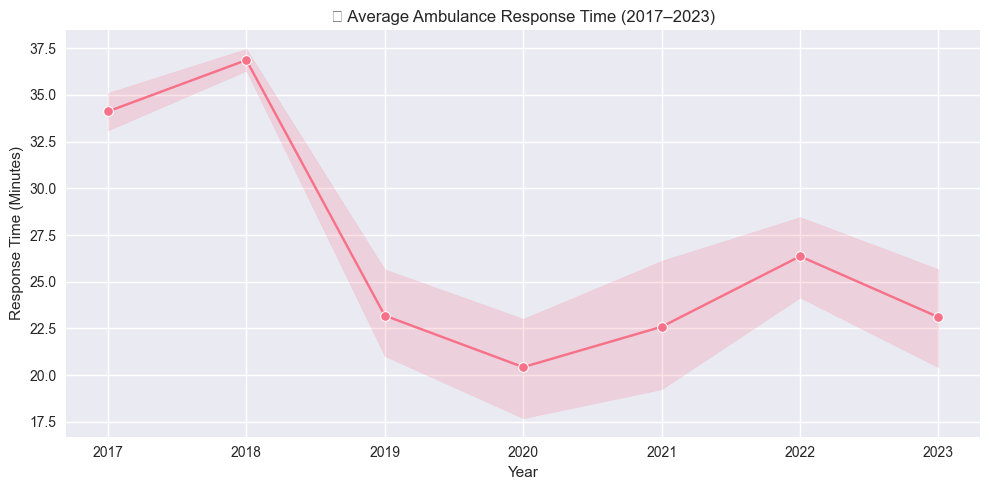

In [11]:
# 1. Trend of Response Time Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Response_Time_Min', marker='o')
plt.title("🚑 Average Ambulance Response Time (2017–2023)")
plt.ylabel("Response Time (Minutes)")
plt.grid(True)
plt.tight_layout()
plt.show()

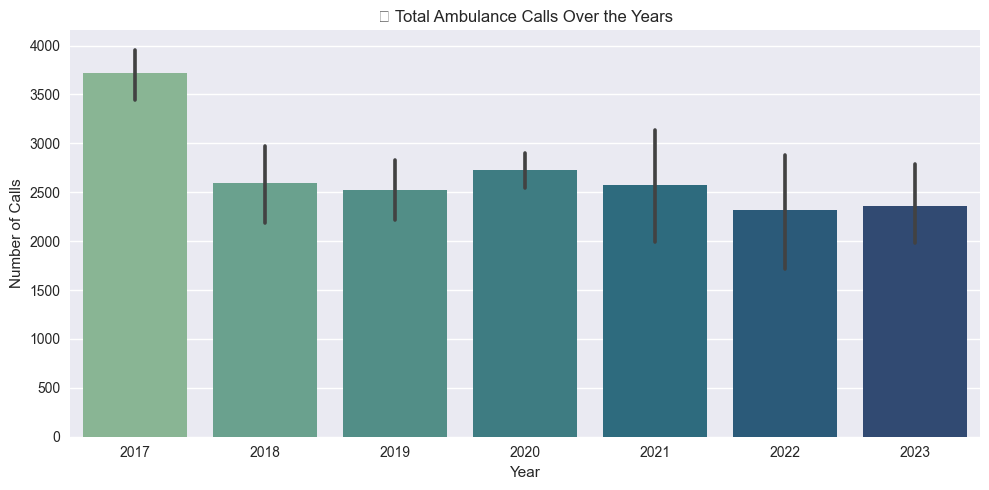

In [12]:
# 2. Ambulance Calls Over Years
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x='Year', y='Ambulance_Calls', palette="crest")
plt.title("📞 Total Ambulance Calls Over the Years")
plt.ylabel("Number of Calls")
plt.tight_layout()
plt.show()

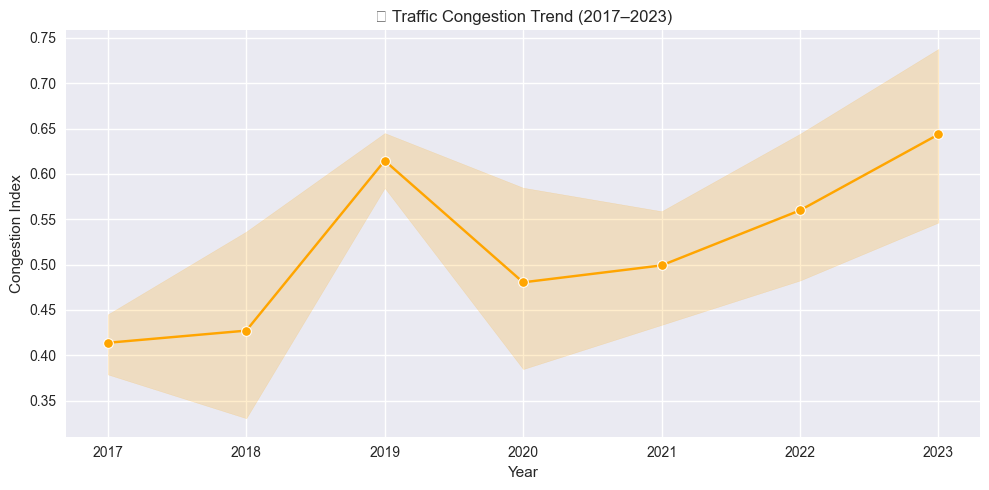

In [13]:
# 3. Average Traffic Congestion Over Years
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Year', y='Traffic_Congestion_Index', marker='o', color='orange')
plt.title("🚗 Traffic Congestion Trend (2017–2023)")
plt.ylabel("Congestion Index")
plt.grid(True)
plt.tight_layout()
plt.show()


🔗 CORRELATION ANALYSIS


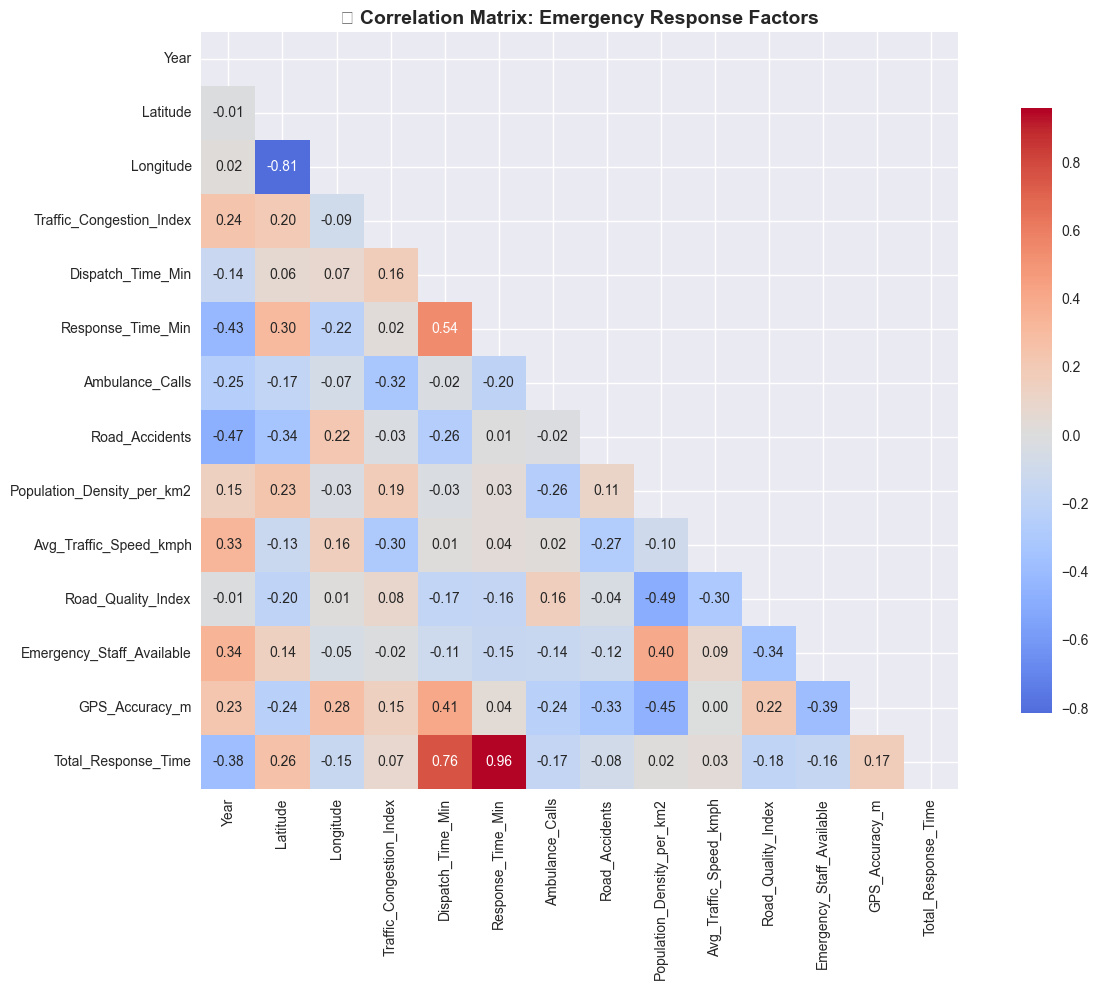


🎯 KEY CORRELATIONS WITH RESPONSE TIME:
Total_Response_Time: 0.959 (Strong Positive)
Dispatch_Time_Min: 0.542 (Moderate Positive)
Year: -0.425 (Moderate Negative)
Latitude: 0.304 (Moderate Positive)
Longitude: -0.223
Ambulance_Calls: -0.205
Road_Quality_Index: -0.163
Emergency_Staff_Available: -0.155
GPS_Accuracy_m: 0.039
Avg_Traffic_Speed_kmph: 0.035
Population_Density_per_km2: 0.032
Traffic_Congestion_Index: 0.025
Road_Accidents: 0.007


In [14]:
# =============================================================================
# STEP 6: EXPLORATORY DATA ANALYSIS (EDA) - PART 2: CORRELATION ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("🔗 CORRELATION ANALYSIS")
print("="*60)

# Select numerical columns for correlation
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
correlation_data = df_clean[numerical_cols]

# Calculate correlation matrix
correlation_matrix = correlation_data.corr()

# Create correlation heatmap
plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('🔗 Correlation Matrix: Emergency Response Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Key correlations with Response Time
response_correlations = correlation_matrix['Response_Time_Min'].sort_values(key=abs, ascending=False)
print("\n🎯 KEY CORRELATIONS WITH RESPONSE TIME:")
print("=" * 45)
for feature, corr in response_correlations.items():
    if feature != 'Response_Time_Min':
        if abs(corr) > 0.3:
            strength = "Strong" if abs(corr) > 0.7 else "Moderate"
            direction = "Positive" if corr > 0 else "Negative"
            print(f"{feature}: {corr:.3f} ({strength} {direction})")
        else:
            print(f"{feature}: {corr:.3f}")



📈 TREND ANALYSIS


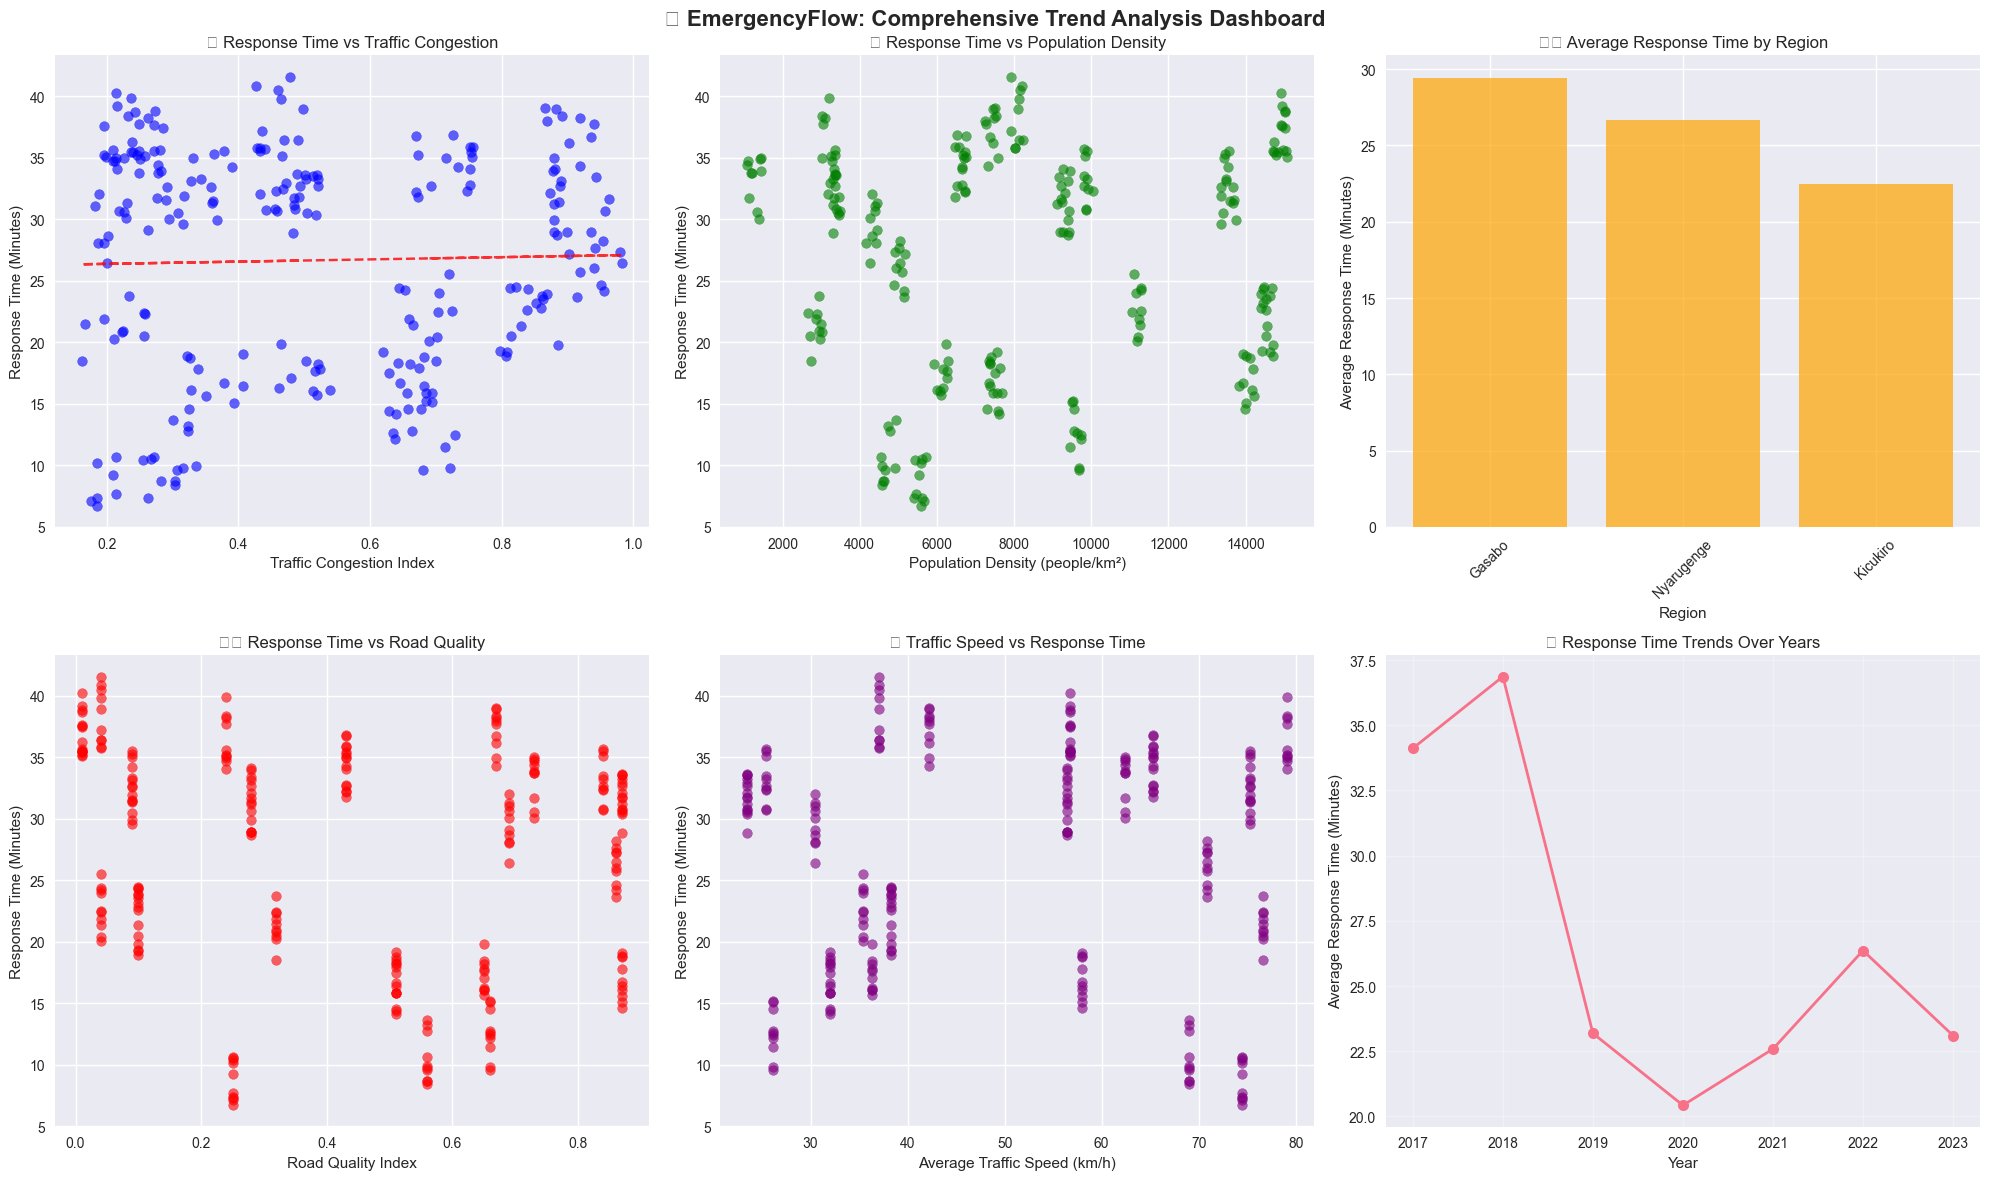


🔍 TREND ANALYSIS INSIGHTS:
🚦 Traffic Congestion-Response Correlation: 0.025
👥 Population Density-Response Correlation: 0.032
🛣️ Road Quality-Response Correlation: -0.163
🚗 Traffic Speed-Response Correlation: 0.035
📍 Slowest Region: Gasabo
📍 Fastest Region: Kicukiro
📈 Response Time Change (2017-2023): 11.01 minutes


In [15]:
# =============================================================================
# STEP 7: EXPLORATORY DATA ANALYSIS (EDA) - PART 3: TREND ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("📈 TREND ANALYSIS")
print("="*60)

# Create comprehensive trend analysis
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('📈 EmergencyFlow: Comprehensive Trend Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Response Time vs Traffic Congestion
axes[0, 0].scatter(df_clean['Traffic_Congestion_Index'], df_clean['Response_Time_Min'], 
                  alpha=0.6, color='blue')
axes[0, 0].set_title('🚦 Response Time vs Traffic Congestion')
axes[0, 0].set_xlabel('Traffic Congestion Index')
axes[0, 0].set_ylabel('Response Time (Minutes)')

# Add trend line
z = np.polyfit(df_clean['Traffic_Congestion_Index'], df_clean['Response_Time_Min'], 1)
p = np.poly1d(z)
axes[0, 0].plot(df_clean['Traffic_Congestion_Index'], p(df_clean['Traffic_Congestion_Index']), "r--", alpha=0.8)

# 2. Response Time vs Population Density
axes[0, 1].scatter(df_clean['Population_Density_per_km2'], df_clean['Response_Time_Min'], 
                  alpha=0.6, color='green')
axes[0, 1].set_title('👥 Response Time vs Population Density')
axes[0, 1].set_xlabel('Population Density (people/km²)')
axes[0, 1].set_ylabel('Response Time (Minutes)')

# 3. Average Response Time by Region
region_response = df_clean.groupby('Region')['Response_Time_Min'].mean().sort_values(ascending=False)
axes[0, 2].bar(range(len(region_response)), region_response.values, color='orange', alpha=0.7)
axes[0, 2].set_title('🗺️ Average Response Time by Region')
axes[0, 2].set_xlabel('Region')
axes[0, 2].set_ylabel('Average Response Time (Minutes)')
axes[0, 2].set_xticks(range(len(region_response)))
axes[0, 2].set_xticklabels(region_response.index, rotation=45)

# 4. Response Time vs Road Quality
axes[1, 0].scatter(df_clean['Road_Quality_Index'], df_clean['Response_Time_Min'], 
                  alpha=0.6, color='red')
axes[1, 0].set_title('🛣️ Response Time vs Road Quality')
axes[1, 0].set_xlabel('Road Quality Index')
axes[1, 0].set_ylabel('Response Time (Minutes)')

# 5. Traffic Speed vs Response Time
axes[1, 1].scatter(df_clean['Avg_Traffic_Speed_kmph'], df_clean['Response_Time_Min'], 
                  alpha=0.6, color='purple')
axes[1, 1].set_title('🚗 Traffic Speed vs Response Time')
axes[1, 1].set_xlabel('Average Traffic Speed (km/h)')
axes[1, 1].set_ylabel('Response Time (Minutes)')

# 6. Response Time Trends Over Years
yearly_response = df_clean.groupby('Year')['Response_Time_Min'].mean()
axes[1, 2].plot(yearly_response.index, yearly_response.values, marker='o', linewidth=2, markersize=8)
axes[1, 2].set_title('📅 Response Time Trends Over Years')
axes[1, 2].set_xlabel('Year')
axes[1, 2].set_ylabel('Average Response Time (Minutes)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print trend insights
print("\n🔍 TREND ANALYSIS INSIGHTS:")
print("=" * 35)

traffic_corr = df_clean['Response_Time_Min'].corr(df_clean['Traffic_Congestion_Index'])
population_corr = df_clean['Response_Time_Min'].corr(df_clean['Population_Density_per_km2'])
road_quality_corr = df_clean['Response_Time_Min'].corr(df_clean['Road_Quality_Index'])
speed_corr = df_clean['Response_Time_Min'].corr(df_clean['Avg_Traffic_Speed_kmph'])

print(f"🚦 Traffic Congestion-Response Correlation: {traffic_corr:.3f}")
print(f"👥 Population Density-Response Correlation: {population_corr:.3f}")
print(f"🛣️ Road Quality-Response Correlation: {road_quality_corr:.3f}")
print(f"🚗 Traffic Speed-Response Correlation: {speed_corr:.3f}")

worst_region = df_clean.groupby('Region')['Response_Time_Min'].mean().idxmax()
best_region = df_clean.groupby('Region')['Response_Time_Min'].mean().idxmin()
print(f"📍 Slowest Region: {worst_region}")
print(f"📍 Fastest Region: {best_region}")

# Year-over-year improvement
if len(yearly_response) > 1:
    improvement = yearly_response.iloc[0] - yearly_response.iloc[-1]
    print(f"📈 Response Time Change ({yearly_response.index[0]}-{yearly_response.index[-1]}): {improvement:.2f} minutes")



🎯 CLUSTERING ANALYSIS


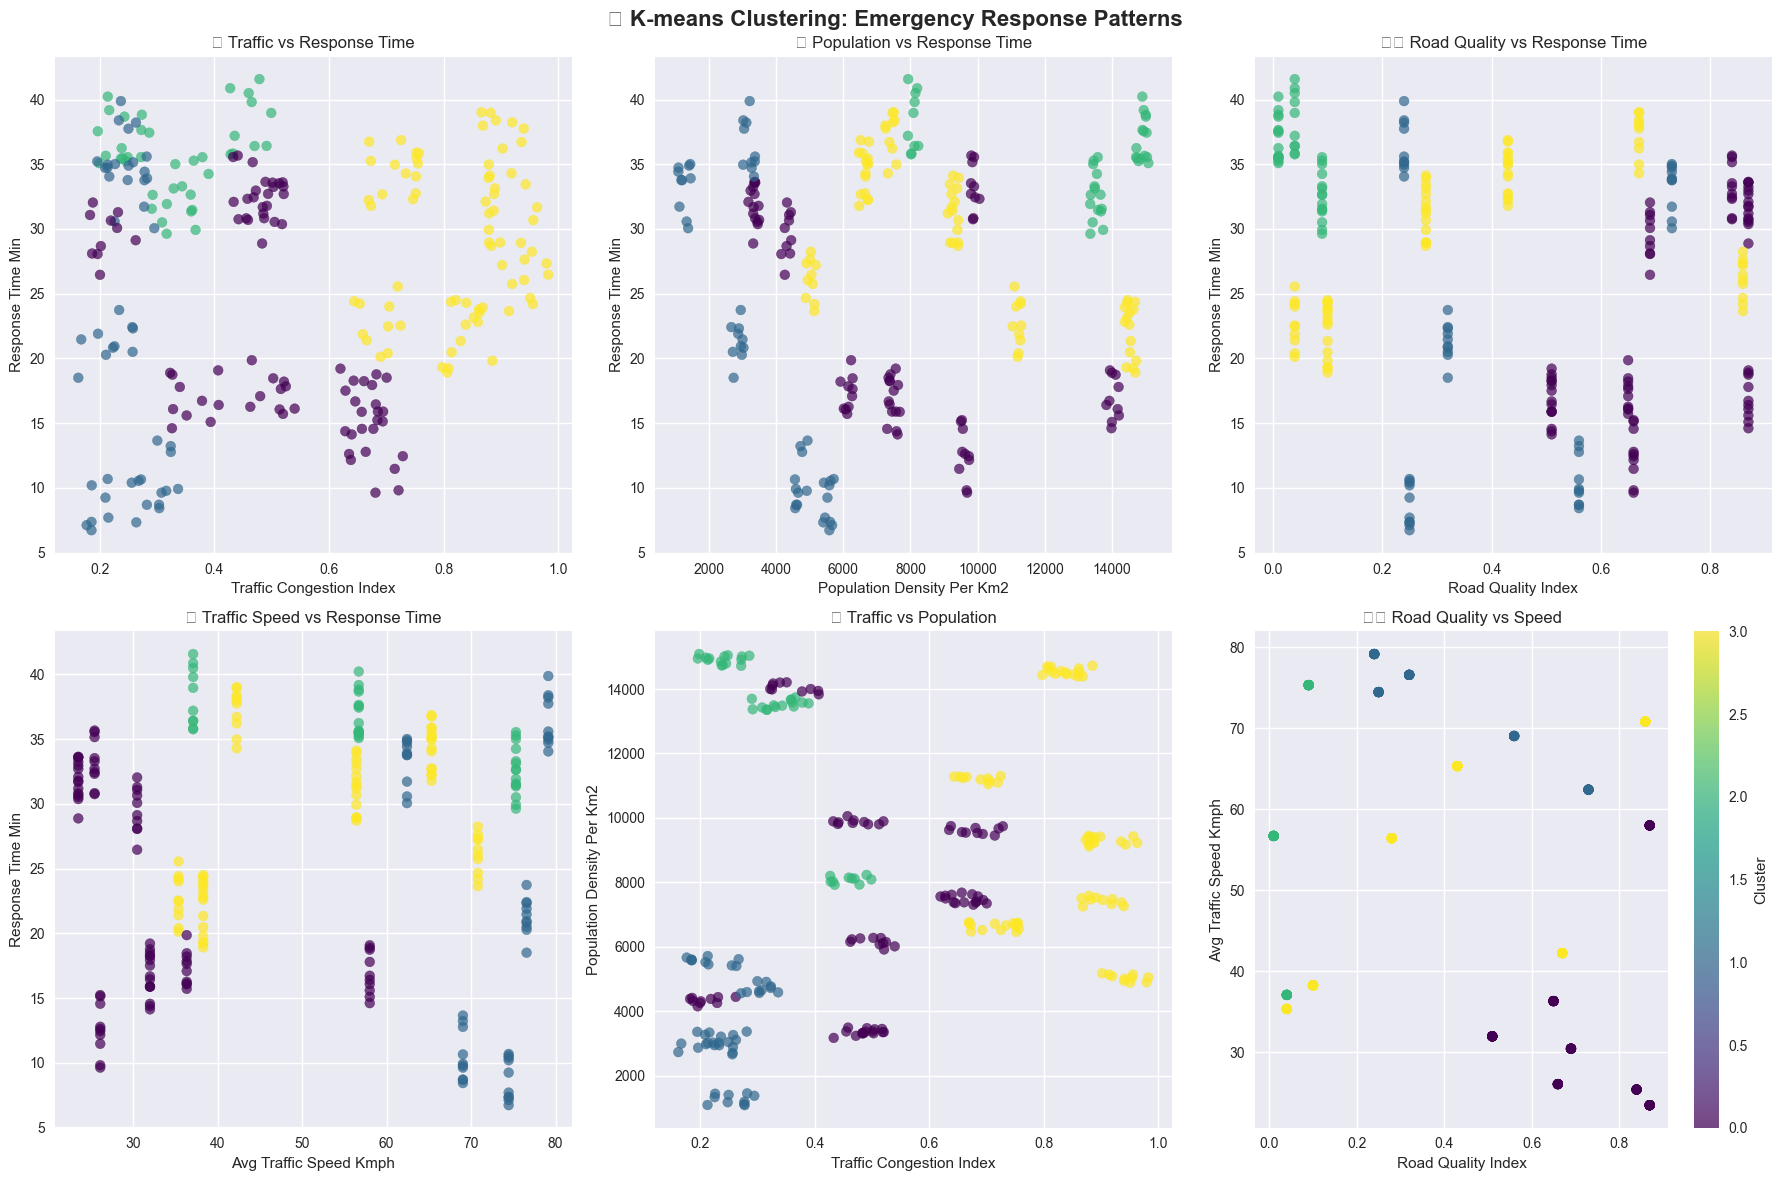


📊 CLUSTER ANALYSIS RESULTS:
         Traffic_Congestion_Index  Population_Density_per_km2  \
Cluster                                                         
0                            0.49                     7532.46   
1                            0.25                     3519.48   
2                            0.33                    12685.32   
3                            0.83                     9252.28   

         Response_Time_Min  Road_Quality_Index  Avg_Traffic_Speed_kmph  
Cluster                                                                 
0                    22.82                0.72                   32.44  
1                    22.05                0.42                   72.32  
2                    35.63                0.05                   58.78  
3                    29.05                0.37                   51.79  

📈 CLUSTER SIZE DISTRIBUTION:
Cluster 0: 80 areas (32.7%)
Cluster 1: 50 areas (20.4%)
Cluster 2: 40 areas (16.3%)
Cluster 3: 75 areas (30.6%)


In [16]:
# =============================================================================
# STEP 8: CLUSTERING ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("🎯 CLUSTERING ANALYSIS")
print("="*60)

# Prepare data for clustering
clustering_features = ['Traffic_Congestion_Index', 'Population_Density_per_km2', 
                      'Response_Time_Min', 'Road_Quality_Index', 'Avg_Traffic_Speed_kmph']

# Select features for clustering
X_cluster = df_clean[clustering_features].copy()

# Standardize the features
scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_clean['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

# Visualize clusters
fig = plt.figure(figsize=(18, 12))

# 2D scatter plots
plots = [
    ('Traffic_Congestion_Index', 'Response_Time_Min', '🚦 Traffic vs Response Time'),
    ('Population_Density_per_km2', 'Response_Time_Min', '👥 Population vs Response Time'),
    ('Road_Quality_Index', 'Response_Time_Min', '🛣️ Road Quality vs Response Time'),
    ('Avg_Traffic_Speed_kmph', 'Response_Time_Min', '🚗 Traffic Speed vs Response Time'),
    ('Traffic_Congestion_Index', 'Population_Density_per_km2', '🚦 Traffic vs Population'),
    ('Road_Quality_Index', 'Avg_Traffic_Speed_kmph', '🛣️ Road Quality vs Speed')
]

for i, (x_col, y_col, title) in enumerate(plots, 1):
    ax = plt.subplot(2, 3, i)
    scatter = plt.scatter(df_clean[x_col], df_clean[y_col], 
                        c=df_clean['Cluster'], cmap='viridis', alpha=0.7, s=50)
    plt.xlabel(x_col.replace('_', ' ').title())
    plt.ylabel(y_col.replace('_', ' ').title())
    plt.title(title)
    if i == 6:  # Add colorbar to the last plot
        plt.colorbar(scatter, label='Cluster')

plt.suptitle('🎯 K-means Clustering: Emergency Response Patterns', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Cluster analysis
print("\n📊 CLUSTER ANALYSIS RESULTS:")
print("=" * 35)
cluster_summary = df_clean.groupby('Cluster')[clustering_features].mean().round(2)
print(cluster_summary)

print("\n📈 CLUSTER SIZE DISTRIBUTION:")
cluster_counts = df_clean['Cluster'].value_counts().sort_index()
for cluster, count in cluster_counts.items():
    percentage = (count / len(df_clean)) * 100
    print(f"Cluster {cluster}: {count} areas ({percentage:.1f}%)")

# Cluster interpretation
print("\n🔍 CLUSTER INTERPRETATIONS:")
print("=" * 30)
for i in range(4):
    cluster_data = df_clean[df_clean['Cluster'] == i]
    avg_response = cluster_data['Response_Time_Min'].mean()
    avg_traffic = cluster_data['Traffic_Congestion_Index'].mean()
    avg_pop = cluster_data['Population_Density_per_km2'].mean()
    avg_road = cluster_data['Road_Quality_Index'].mean()
    size = len(cluster_data)
    
    print(f"Cluster {i}: {size} areas")
    print(f"  📊 Avg Response: {avg_response:.1f} min")
    print(f"  🚦 Avg Traffic: {avg_traffic:.2f}")
    print(f"  👥 Avg Population: {avg_pop:.0f}/km²")
    print(f"  🛣️ Avg Road Quality: {avg_road:.2f}")

In [17]:
# =============================================================================
# STEP 9: MACHINE LEARNING MODEL PREPARATION
# =============================================================================
print("\n" + "="*60)
print("🤖 MACHINE LEARNING MODEL PREPARATION")
print("="*60)

# Prepare features and target
feature_columns = [
    'Traffic_Congestion_Index',
    'Population_Density_per_km2', 
    'Road_Quality_Index',
    'Avg_Traffic_Speed_kmph',
    'Emergency_Staff_Available',
    'GPS_Accuracy_m',
    'Dispatch_Time_Min',
    'Year'  # Include year for temporal trends
]

# Add encoded categorical features
categorical_features = ['Region', 'Hospital_Nearby']
label_encoders = {}

for col in categorical_features:
    if col in df_clean.columns:
        le = LabelEncoder()
        df_clean[f'{col}_encoded'] = le.fit_transform(df_clean[col])
        label_encoders[col] = le
        feature_columns.append(f'{col}_encoded')

print(f"🎯 Selected Features: {feature_columns}")

# Prepare the data for modeling
X = df_clean[feature_columns]
y = df_clean['Response_Time_Min']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Training set size: {X_train.shape[0]} samples")
print(f"📊 Test set size: {X_test.shape[0]} samples")
print(f"📊 Number of features: {X_train.shape[1]}")

# Feature statistics
print(f"\n📈 Target Variable (Response_Time_Min) Statistics:")
print(f"  Mean: {y.mean():.2f} minutes")
print(f"  Std: {y.std():.2f} minutes")
print(f"  Min: {y.min():.2f} minutes")
print(f"  Max: {y.max():.2f} minutes")



🤖 MACHINE LEARNING MODEL PREPARATION
🎯 Selected Features: ['Traffic_Congestion_Index', 'Population_Density_per_km2', 'Road_Quality_Index', 'Avg_Traffic_Speed_kmph', 'Emergency_Staff_Available', 'GPS_Accuracy_m', 'Dispatch_Time_Min', 'Year', 'Region_encoded', 'Hospital_Nearby_encoded']
📊 Training set size: 196 samples
📊 Test set size: 49 samples
📊 Number of features: 10

📈 Target Variable (Response_Time_Min) Statistics:
  Mean: 26.66 minutes
  Std: 9.20 minutes
  Min: 6.72 minutes
  Max: 41.58 minutes



🚀 MACHINE LEARNING MODELS TRAINING

🔄 Training Linear Regression...
✅ Linear Regression Results:
   📊 Train R² Score: 0.5126
   📊 Test R² Score: 0.4589
   📊 Test RMSE: 6.5146 minutes
   📊 Test MAE: 5.2398 minutes

🔄 Training Random Forest...
✅ Random Forest Results:
   📊 Train R² Score: 0.9924
   📊 Test R² Score: 0.9479
   📊 Test RMSE: 2.0211 minutes
   📊 Test MAE: 1.6700 minutes


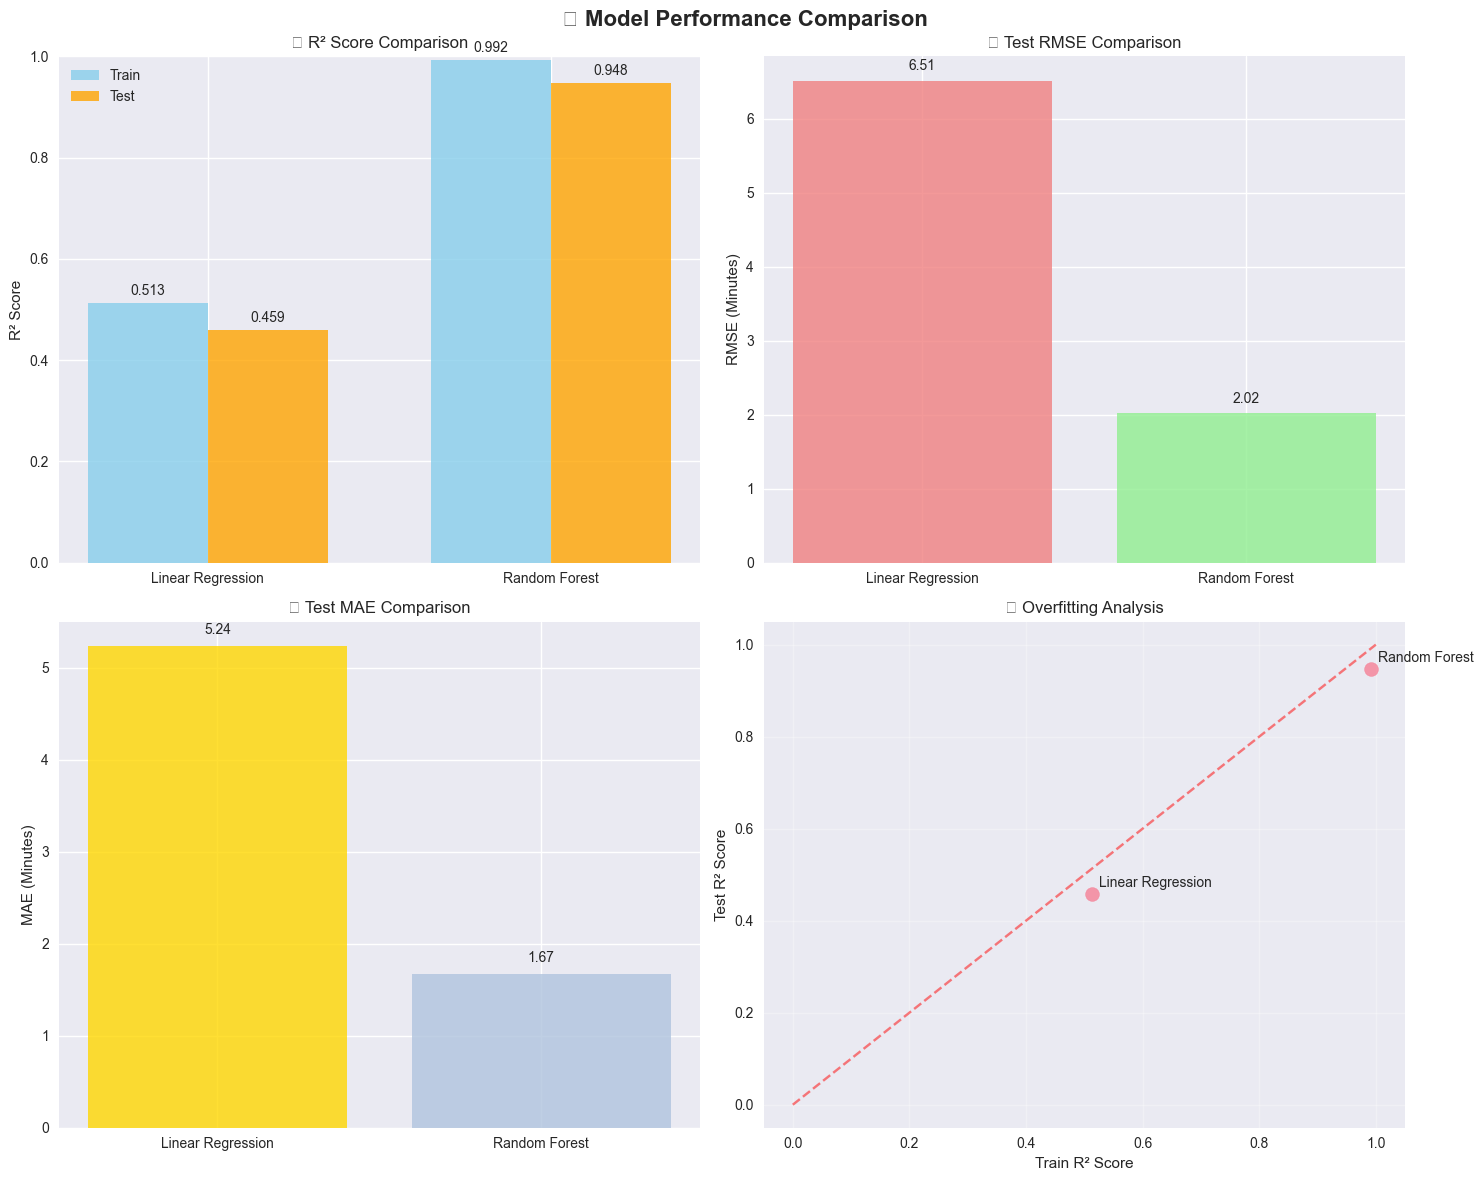


🏆 BEST MODEL: Random Forest
   📊 Test R² Score: 0.9479
   📊 Test RMSE: 2.0211 minutes
   📊 Test MAE: 1.6700 minutes


In [18]:
# =============================================================================
# STEP 10: MACHINE LEARNING MODELS TRAINING & EVALUATION
# =============================================================================
print("\n" + "="*60)
print("🚀 MACHINE LEARNING MODELS TRAINING")
print("="*60)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
}

model_results = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    # Store results
    model_results[name] = {
        'model': model,
        'train_predictions': y_pred_train,
        'test_predictions': y_pred_test,
        'train_mse': train_mse,
        'test_mse': test_mse,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }
    
    print(f"✅ {name} Results:")
    print(f"   📊 Train R² Score: {train_r2:.4f}")
    print(f"   📊 Test R² Score: {test_r2:.4f}")
    print(f"   📊 Test RMSE: {test_rmse:.4f} minutes")
    print(f"   📊 Test MAE: {test_mae:.4f} minutes")

# Model comparison visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🏆 Model Performance Comparison', fontsize=16, fontweight='bold')

model_names = list(model_results.keys())
train_r2_scores = [model_results[name]['train_r2'] for name in model_names]
test_r2_scores = [model_results[name]['test_r2'] for name in model_names]
test_rmse_scores = [model_results[name]['test_rmse'] for name in model_names]
test_mae_scores = [model_results[name]['test_mae'] for name in model_names]

# R² Score comparison
x_pos = np.arange(len(model_names))
width = 0.35

axes[0, 0].bar(x_pos - width/2, train_r2_scores, width, label='Train', color='skyblue', alpha=0.8)
axes[0, 0].bar(x_pos + width/2, test_r2_scores, width, label='Test', color='orange', alpha=0.8)
axes[0, 0].set_title('📊 R² Score Comparison')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(model_names)
axes[0, 0].legend()
axes[0, 0].set_ylim(0, 1)

# Add value labels
for i, (train_val, test_val) in enumerate(zip(train_r2_scores, test_r2_scores)):
    axes[0, 0].text(i - width/2, train_val + 0.01, f'{train_val:.3f}', ha='center', va='bottom')
    axes[0, 0].text(i + width/2, test_val + 0.01, f'{test_val:.3f}', ha='center', va='bottom')

# RMSE comparison
axes[0, 1].bar(model_names, test_rmse_scores, color=['lightcoral', 'lightgreen'], alpha=0.8)
axes[0, 1].set_title('📉 Test RMSE Comparison')
axes[0, 1].set_ylabel('RMSE (Minutes)')

for i, v in enumerate(test_rmse_scores):
    axes[0, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

# MAE comparison
axes[1, 0].bar(model_names, test_mae_scores, color=['gold', 'lightsteelblue'], alpha=0.8)
axes[1, 0].set_title('📉 Test MAE Comparison')
axes[1, 0].set_ylabel('MAE (Minutes)')

for i, v in enumerate(test_mae_scores):
    axes[1, 0].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

# Overfitting analysis (Train vs Test R²)
axes[1, 1].scatter(train_r2_scores, test_r2_scores, s=100, alpha=0.7)
for i, name in enumerate(model_names):
    axes[1, 1].annotate(name, (train_r2_scores[i], test_r2_scores[i]), 
                       xytext=(5, 5), textcoords='offset points')
axes[1, 1].plot([0, 1], [0, 1], 'r--', alpha=0.5)  # Perfect line
axes[1, 1].set_xlabel('Train R² Score')
axes[1, 1].set_ylabel('Test R² Score')
axes[1, 1].set_title('🎯 Overfitting Analysis')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Select best model
best_model_name = max(model_results.keys(), key=lambda k: model_results[k]['test_r2'])
best_model = model_results[best_model_name]['model']

print(f"\n🏆 BEST MODEL: {best_model_name}")
print(f"   📊 Test R² Score: {model_results[best_model_name]['test_r2']:.4f}")
print(f"   📊 Test RMSE: {model_results[best_model_name]['test_rmse']:.4f} minutes")
print(f"   📊 Test MAE: {model_results[best_model_name]['test_mae']:.4f} minutes")



🎯 FEATURE IMPORTANCE ANALYSIS
🔍 FEATURE IMPORTANCE RANKING:
 1. Dispatch_Time_Min        : 0.3532
 2. Year                     : 0.2868
 3. GPS_Accuracy_m           : 0.0787
 4. Emergency_Staff_Available: 0.0689
 5. Avg_Traffic_Speed_kmph   : 0.0598
 6. Road_Quality_Index       : 0.0590
 7. Population_Density_per_km2: 0.0351
 8. Traffic_Congestion_Index : 0.0247
 9. Region_encoded           : 0.0211
10. Hospital_Nearby_encoded  : 0.0127


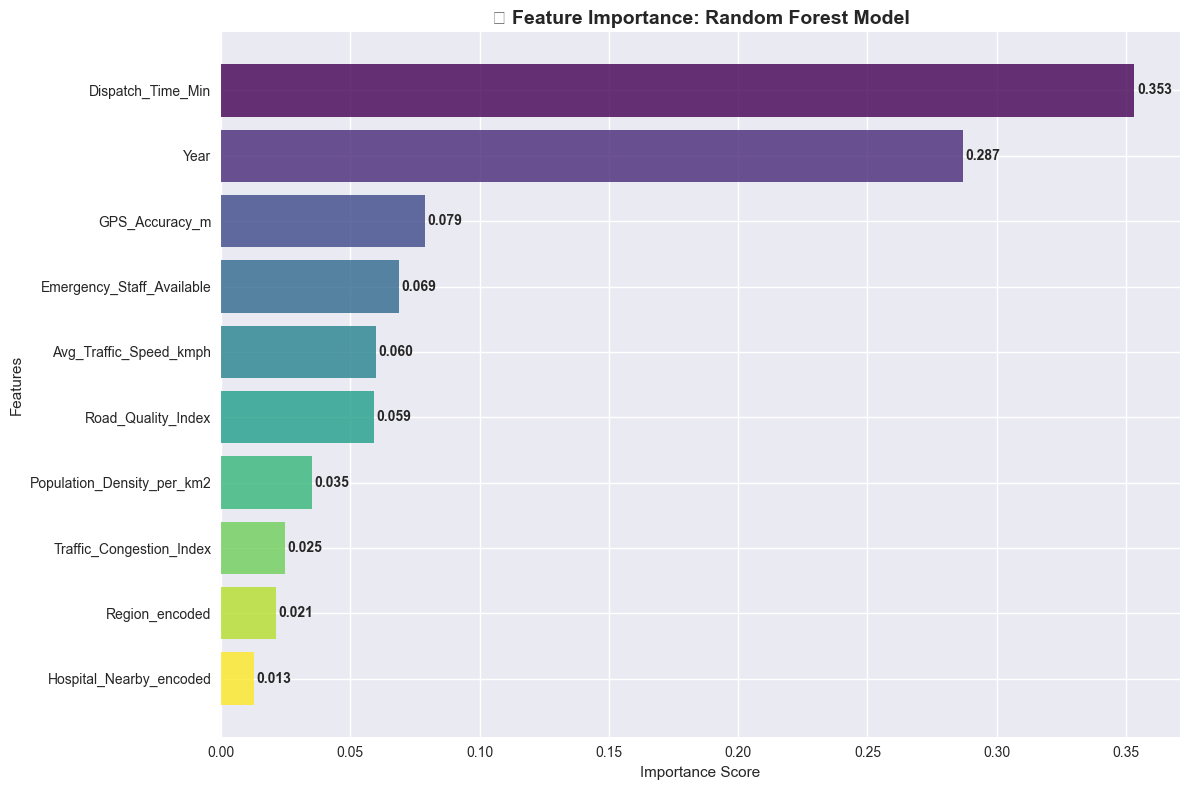


🏆 TOP 5 MOST IMPORTANT FEATURES:
1. Dispatch_Time_Min: 0.3532
2. Year: 0.2868
3. GPS_Accuracy_m: 0.0787
4. Emergency_Staff_Available: 0.0689
5. Avg_Traffic_Speed_kmph: 0.0598


In [19]:
# =============================================================================
# STEP 11: FEATURE IMPORTANCE ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("🎯 FEATURE IMPORTANCE ANALYSIS")
print("="*60)

# Get feature importance from Random Forest
if 'Random Forest' in model_results:
    rf_model = model_results['Random Forest']['model']
    feature_importance = pd.DataFrame({
        'Feature': feature_columns,
        'Importance': rf_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("🔍 FEATURE IMPORTANCE RANKING:")
    print("=" * 35)
    for idx, (_, row) in enumerate(feature_importance.iterrows(), 1):
        print(f"{idx:2d}. {row['Feature']:<25}: {row['Importance']:.4f}")
    
    # Visualize feature importance
    plt.figure(figsize=(12, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(feature_importance)))
    bars = plt.barh(feature_importance['Feature'], feature_importance['Importance'], color=colors, alpha=0.8)
    plt.title('🎯 Feature Importance: Random Forest Model', fontsize=14, fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.gca().invert_yaxis()
    
    # Add value labels
    for i, (bar, v) in enumerate(zip(bars, feature_importance['Importance'])):
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Top 5 most important features
    top_5_features = feature_importance.head(5)
    print(f"\n🏆 TOP 5 MOST IMPORTANT FEATURES:")
    print("=" * 35)
    for idx, (_, row) in enumerate(top_5_features.iterrows(), 1):
        print(f"{idx}. {row['Feature']}: {row['Importance']:.4f}")


📊 PREDICTION VISUALIZATION & MODEL VALIDATION


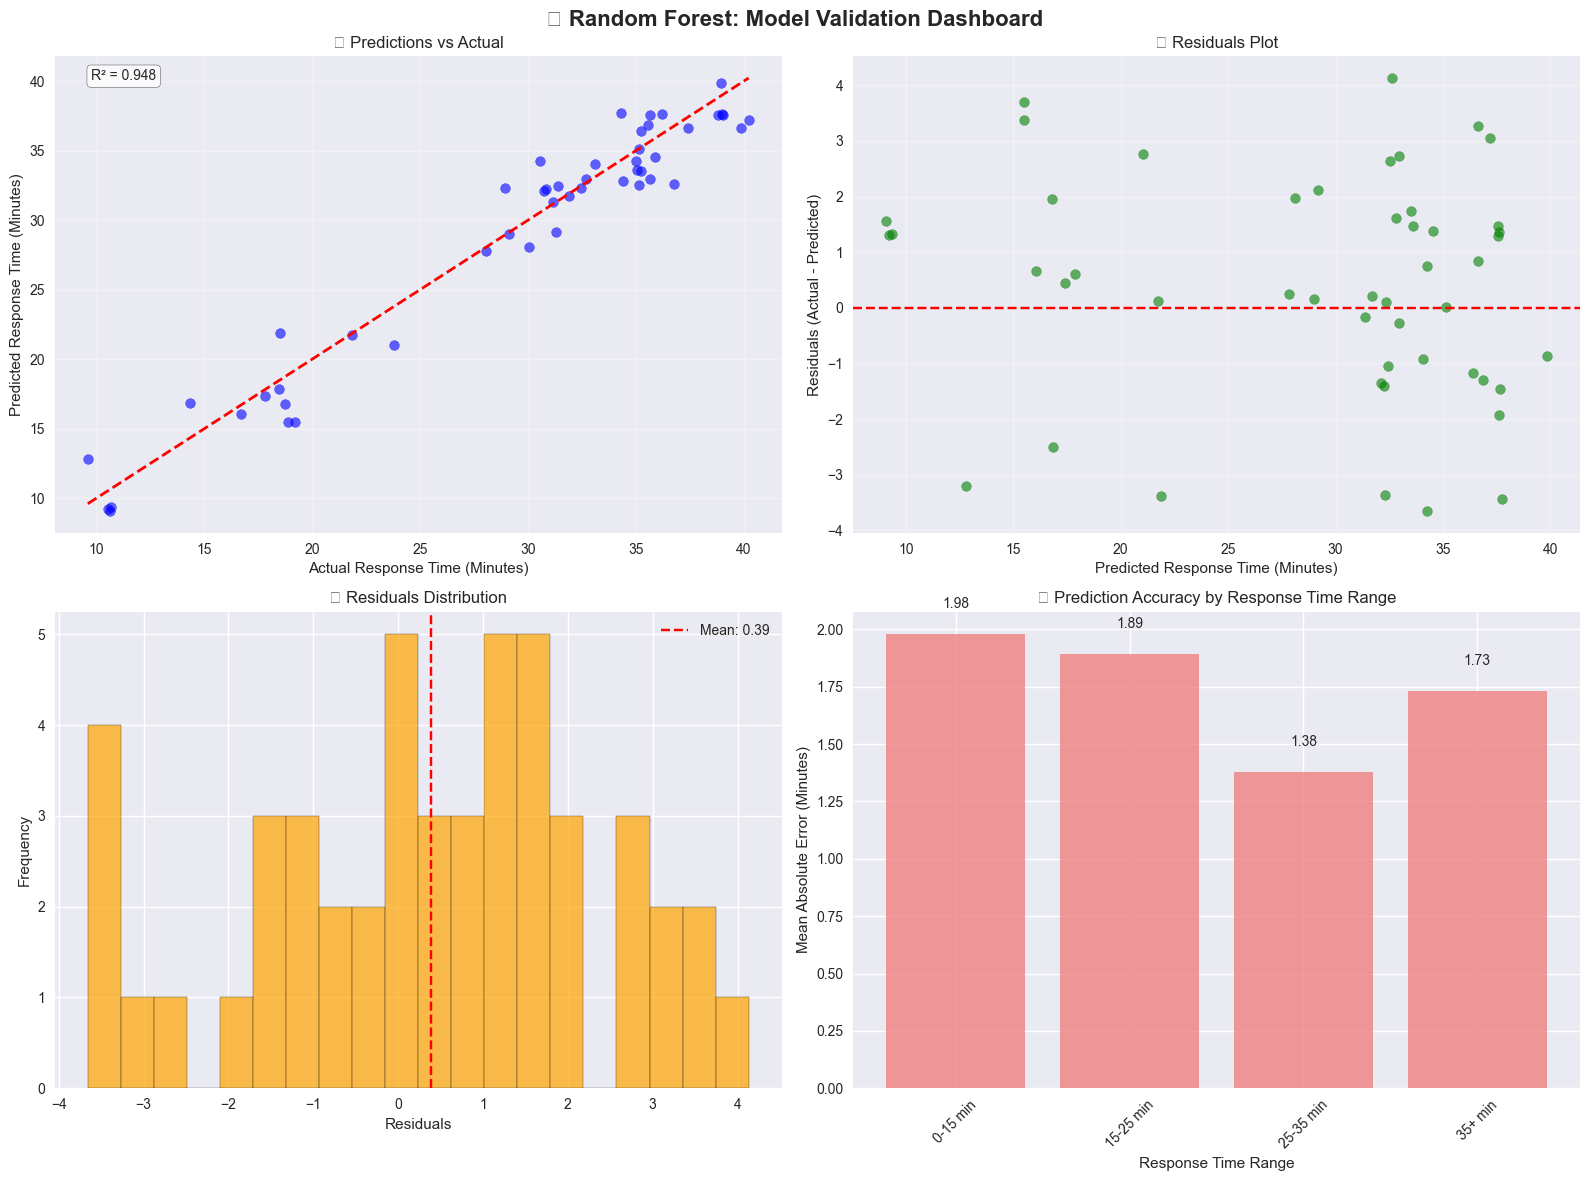


📊 PREDICTION ACCURACY BY RESPONSE TIME RANGES:
0-15 min: MAE = 1.98 minutes (5 samples)
15-25 min: MAE = 1.89 minutes (9 samples)
25-35 min: MAE = 1.38 minutes (16 samples)
35+ min: MAE = 1.73 minutes (19 samples)


In [21]:
 #=============================================================================
# STEP 12: PREDICTION VISUALIZATION & MODEL VALIDATION
# =============================================================================
print("\n" + "="*60)
print("📊 PREDICTION VISUALIZATION & MODEL VALIDATION")
print("="*60)

# Create prediction vs actual visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle(f'📊 {best_model_name}: Model Validation Dashboard', fontsize=16, fontweight='bold')

# Scatter plot: Predicted vs Actual
best_predictions = model_results[best_model_name]['test_predictions']

axes[0, 0].scatter(y_test, best_predictions, alpha=0.6, color='blue', s=50)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Response Time (Minutes)')
axes[0, 0].set_ylabel('Predicted Response Time (Minutes)')
axes[0, 0].set_title(f'🎯 Predictions vs Actual')
axes[0, 0].grid(True, alpha=0.3)

# Add R² score to the plot
r2_score_test = model_results[best_model_name]['test_r2']
axes[0, 0].text(0.05, 0.95, f'R² = {r2_score_test:.3f}', transform=axes[0, 0].transAxes, 
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Residuals plot
residuals = y_test - best_predictions
axes[0, 1].scatter(best_predictions, residuals, alpha=0.6, color='green', s=50)
axes[0, 1].axhline(y=0, color='r', linestyle='--')
axes[0, 1].set_xlabel('Predicted Response Time (Minutes)')
axes[0, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[0, 1].set_title(f'📈 Residuals Plot')
axes[0, 1].grid(True, alpha=0.3)

# Distribution of residuals
axes[1, 0].hist(residuals, bins=20, color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(residuals.mean(), color='red', linestyle='--', 
                  label=f'Mean: {residuals.mean():.2f}')
axes[1, 0].set_xlabel('Residuals')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('📊 Residuals Distribution')
axes[1, 0].legend()

# Prediction accuracy by actual value ranges
bins = [0, 15, 25, 35, float('inf')]
labels = ['0-15 min', '15-25 min', '25-35 min', '35+ min']
y_test_binned = pd.cut(y_test, bins=bins, labels=labels)

mae_by_range = []
for label in labels:
    mask = y_test_binned == label
    if mask.sum() > 0:
        actual_range = y_test[mask]
        pred_range = best_predictions[mask]
        mae_range = mean_absolute_error(actual_range, pred_range)
        mae_by_range.append(mae_range)
    else:
        mae_by_range.append(0)

axes[1, 1].bar(labels, mae_by_range, color='lightcoral', alpha=0.8)
axes[1, 1].set_title('📊 Prediction Accuracy by Response Time Range')
axes[1, 1].set_xlabel('Response Time Range')
axes[1, 1].set_ylabel('Mean Absolute Error (Minutes)')
axes[1, 1].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(mae_by_range):
    if v > 0:
        axes[1, 1].text(i, v + 0.1, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Prediction accuracy by ranges
print("\n📊 PREDICTION ACCURACY BY RESPONSE TIME RANGES:")
print("=" * 50)

for i, label in enumerate(labels):
    mask = y_test_binned == label
    if mask.sum() > 0:
        actual_range = y_test[mask]
        pred_range = best_predictions[mask]
        mae_range = mean_absolute_error(actual_range, pred_range)
        print(f"{label}: MAE = {mae_range:.2f} minutes ({mask.sum()} samples)")



🗺️ GEOGRAPHIC ANALYSIS & HOTSPOT IDENTIFICATION
🏆 REGION PERFORMANCE RANKING (Worst to Best):
            Avg_Response  Median_Response  Std_Response  Case_Count  \
Region                                                                
Gasabo             29.43            31.79          6.93         105   
Nyarugenge         26.68            29.60         10.52          70   
Kicukiro           22.50            20.67          9.33          70   

            Avg_Traffic  Avg_Population  Avg_Road_Quality  Avg_Speed  
Region                                                                
Gasabo             0.60         9965.32              0.33      49.64  
Nyarugenge         0.47         6404.90              0.56      48.29  
Kicukiro           0.45         6931.47              0.50      55.05  

🚨 TOP 10 SECTORS WITH LONGEST RESPONSE TIMES:
           Avg_Response  Cases
Sector                        
Kimironko         30.49      7
Rutunga           30.43      7
Kacyiru           30.10

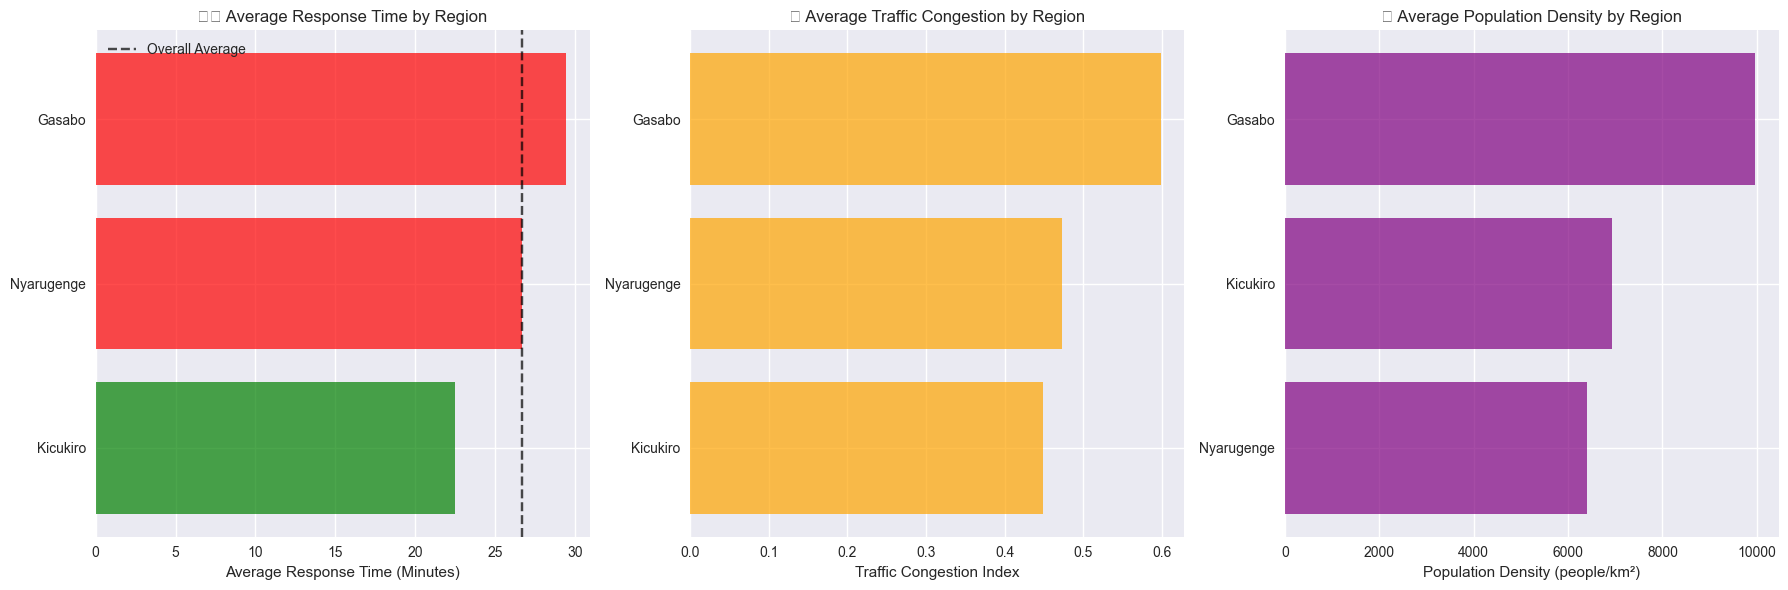

In [22]:
# =============================================================================
# STEP 13: GEOGRAPHIC ANALYSIS & HOTSPOT IDENTIFICATION
# =============================================================================
print("\n" + "="*60)
print("🗺️ GEOGRAPHIC ANALYSIS & HOTSPOT IDENTIFICATION")
print("="*60)

# Region-level analysis
region_stats = df_clean.groupby('Region').agg({
    'Response_Time_Min': ['mean', 'median', 'std', 'count'],
    'Traffic_Congestion_Index': 'mean',
    'Population_Density_per_km2': 'mean',
    'Road_Quality_Index': 'mean',
    'Avg_Traffic_Speed_kmph': 'mean'
}).round(2)

region_stats.columns = ['Avg_Response', 'Median_Response', 'Std_Response', 'Case_Count', 
                       'Avg_Traffic', 'Avg_Population', 'Avg_Road_Quality', 'Avg_Speed']
region_stats = region_stats.sort_values('Avg_Response', ascending=False)

print("🏆 REGION PERFORMANCE RANKING (Worst to Best):")
print("=" * 55)
print(region_stats)

# Sector-level analysis (top and bottom performers)
sector_stats = df_clean.groupby('Sector').agg({
    'Response_Time_Min': ['mean', 'count']
}).round(2)

sector_stats.columns = ['Avg_Response', 'Cases']
sector_stats = sector_stats.sort_values('Avg_Response', ascending=False)

print(f"\n🚨 TOP 10 SECTORS WITH LONGEST RESPONSE TIMES:")
print("=" * 50)
print(sector_stats.head(10))

print(f"\n✅ TOP 10 SECTORS WITH SHORTEST RESPONSE TIMES:")
print("=" * 50)
print(sector_stats.tail(10))

# Identify critical hotspots
critical_threshold = df_clean['Response_Time_Min'].quantile(0.8)  # Top 20% slowest
hotspots = df_clean[df_clean['Response_Time_Min'] >= critical_threshold]

print(f"\n🚨 CRITICAL HOTSPOTS (Response Time ≥ {critical_threshold:.1f} minutes):")
print("=" * 60)
hotspot_summary = hotspots.groupby(['Region', 'Sector']).size().sort_values(ascending=False)
print("Top 15 hotspots:")
print(hotspot_summary.head(15))

# Geographic visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Response time by region
region_response = df_clean.groupby('Region')['Response_Time_Min'].mean().sort_values(ascending=True)
colors = ['red' if x > df_clean['Response_Time_Min'].mean() else 'green' for x in region_response.values]
bars = axes[0].barh(range(len(region_response)), region_response.values, color=colors, alpha=0.7)
axes[0].set_title('🗺️ Average Response Time by Region')
axes[0].set_xlabel('Average Response Time (Minutes)')
axes[0].set_yticks(range(len(region_response)))
axes[0].set_yticklabels(region_response.index)
axes[0].axvline(df_clean['Response_Time_Min'].mean(), color='black', linestyle='--', alpha=0.7, label='Overall Average')
axes[0].legend()

# Traffic congestion by region
region_traffic = df_clean.groupby('Region')['Traffic_Congestion_Index'].mean().sort_values(ascending=True)
axes[1].barh(range(len(region_traffic)), region_traffic.values, color='orange', alpha=0.7)
axes[1].set_title('🚦 Average Traffic Congestion by Region')
axes[1].set_xlabel('Traffic Congestion Index')
axes[1].set_yticks(range(len(region_traffic)))
axes[1].set_yticklabels(region_traffic.index)

# Population density by region
region_population = df_clean.groupby('Region')['Population_Density_per_km2'].mean().sort_values(ascending=True)
axes[2].barh(range(len(region_population)), region_population.values, color='purple', alpha=0.7)
axes[2].set_title('👥 Average Population Density by Region')
axes[2].set_xlabel('Population Density (people/km²)')
axes[2].set_yticks(range(len(region_population)))
axes[2].set_yticklabels(region_population.index)

plt.tight_layout()
plt.show()


📅 TEMPORAL ANALYSIS
📊 YEAR-OVER-YEAR PERFORMANCE:
      Avg_Response  Median_Response  Std_Response  Cases  Avg_Traffic  \
Year                                                                    
2017         34.11            33.64          3.28     35         0.41   
2018         36.86            36.72          1.75     35         0.43   
2019         23.19            21.39          7.11     35         0.61   
2020         20.43            22.81          8.33     35         0.48   
2021         22.59            18.74         10.81     35         0.50   
2022         26.36            27.34          6.59     35         0.56   
2023         23.10            22.32          8.15     35         0.64   

      Avg_Road_Quality  Avg_Staff  
Year                               
2017              0.59      24.29  
2018              0.26      72.14  
2019              0.47      70.86  
2020              0.31      55.43  
2021              0.59      52.29  
2022              0.47      78.71  
202

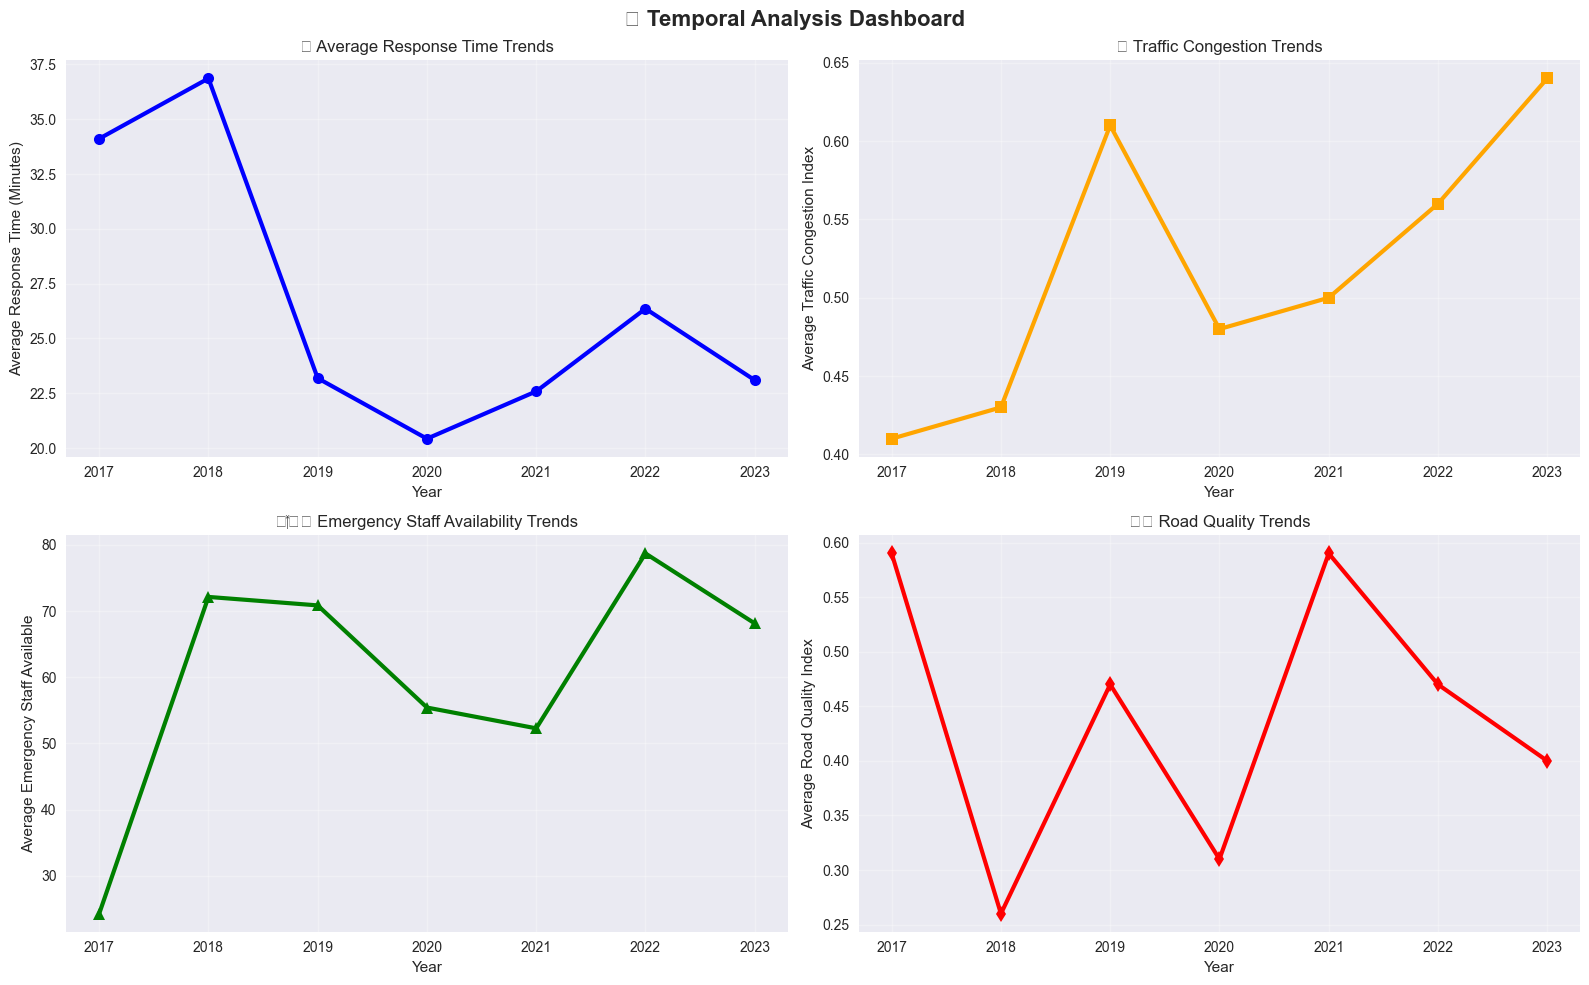


📈 TREND ANALYSIS (2017-2023):
⏱️ Response Time Change: -11.01 minutes
🚦 Traffic Congestion Change: +0.230
👨‍⚕️ Emergency Staff Change: +44


In [23]:
# =============================================================================
# STEP 14: TEMPORAL ANALYSIS
# =============================================================================
print("\n" + "="*60)
print("📅 TEMPORAL ANALYSIS")
print("="*60)

# Year-over-year analysis
yearly_stats = df_clean.groupby('Year').agg({
    'Response_Time_Min': ['mean', 'median', 'std', 'count'],
    'Traffic_Congestion_Index': 'mean',
    'Road_Quality_Index': 'mean',
    'Emergency_Staff_Available': 'mean'
}).round(2)

yearly_stats.columns = ['Avg_Response', 'Median_Response', 'Std_Response', 'Cases',
                       'Avg_Traffic', 'Avg_Road_Quality', 'Avg_Staff']

print("📊 YEAR-OVER-YEAR PERFORMANCE:")
print("=" * 35)
print(yearly_stats)

# Temporal visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('📅 Temporal Analysis Dashboard', fontsize=16, fontweight='bold')

# Response time trends
axes[0, 0].plot(yearly_stats.index, yearly_stats['Avg_Response'], marker='o', linewidth=3, markersize=8, color='blue')
axes[0, 0].set_title('📈 Average Response Time Trends')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Average Response Time (Minutes)')
axes[0, 0].grid(True, alpha=0.3)

# Traffic congestion trends
axes[0, 1].plot(yearly_stats.index, yearly_stats['Avg_Traffic'], marker='s', linewidth=3, markersize=8, color='orange')
axes[0, 1].set_title('🚦 Traffic Congestion Trends')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Average Traffic Congestion Index')
axes[0, 1].grid(True, alpha=0.3)

# Emergency staff trends
axes[1, 0].plot(yearly_stats.index, yearly_stats['Avg_Staff'], marker='^', linewidth=3, markersize=8, color='green')
axes[1, 0].set_title('👨‍⚕️ Emergency Staff Availability Trends')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Average Emergency Staff Available')
axes[1, 0].grid(True, alpha=0.3)

# Road quality trends
axes[1, 1].plot(yearly_stats.index, yearly_stats['Avg_Road_Quality'], marker='d', linewidth=3, markersize=8, color='red')
axes[1, 1].set_title('🛣️ Road Quality Trends')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Average Road Quality Index')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate trends
if len(yearly_stats) > 1:
    response_trend = yearly_stats['Avg_Response'].iloc[-1] - yearly_stats['Avg_Response'].iloc[0]
    traffic_trend = yearly_stats['Avg_Traffic'].iloc[-1] - yearly_stats['Avg_Traffic'].iloc[0]
    staff_trend = yearly_stats['Avg_Staff'].iloc[-1] - yearly_stats['Avg_Staff'].iloc[0]
    
    print(f"\n📈 TREND ANALYSIS ({yearly_stats.index[0]}-{yearly_stats.index[-1]}):")
    print("=" * 45)
    print(f"⏱️ Response Time Change: {response_trend:+.2f} minutes")
    print(f"🚦 Traffic Congestion Change: {traffic_trend:+.3f}")
    print(f"👨‍⚕️ Emergency Staff Change: {staff_trend:+.0f}")


🔮 WHAT-IF SCENARIO ANALYSIS
🎯 SCENARIO TESTING:
📊 Baseline Average Response Time: 28.82 minutes

🚦 SCENARIO 1: 30% Traffic Reduction
   Improved Avg Response: 28.69 minutes
   Time Saved: 0.13 minutes (0.4%)

🛣️ SCENARIO 2: 50% Road Quality Improvement
   Improved Avg Response: 27.96 minutes
   Time Saved: 0.86 minutes (3.0%)

👨‍⚕️ SCENARIO 3: 25% More Emergency Staff
   Improved Avg Response: 27.61 minutes
   Time Saved: 1.20 minutes (4.2%)

🌟 SCENARIO 4: Combined Improvements
   Improved Avg Response: 26.58 minutes
   Time Saved: 2.24 minutes (7.8%)


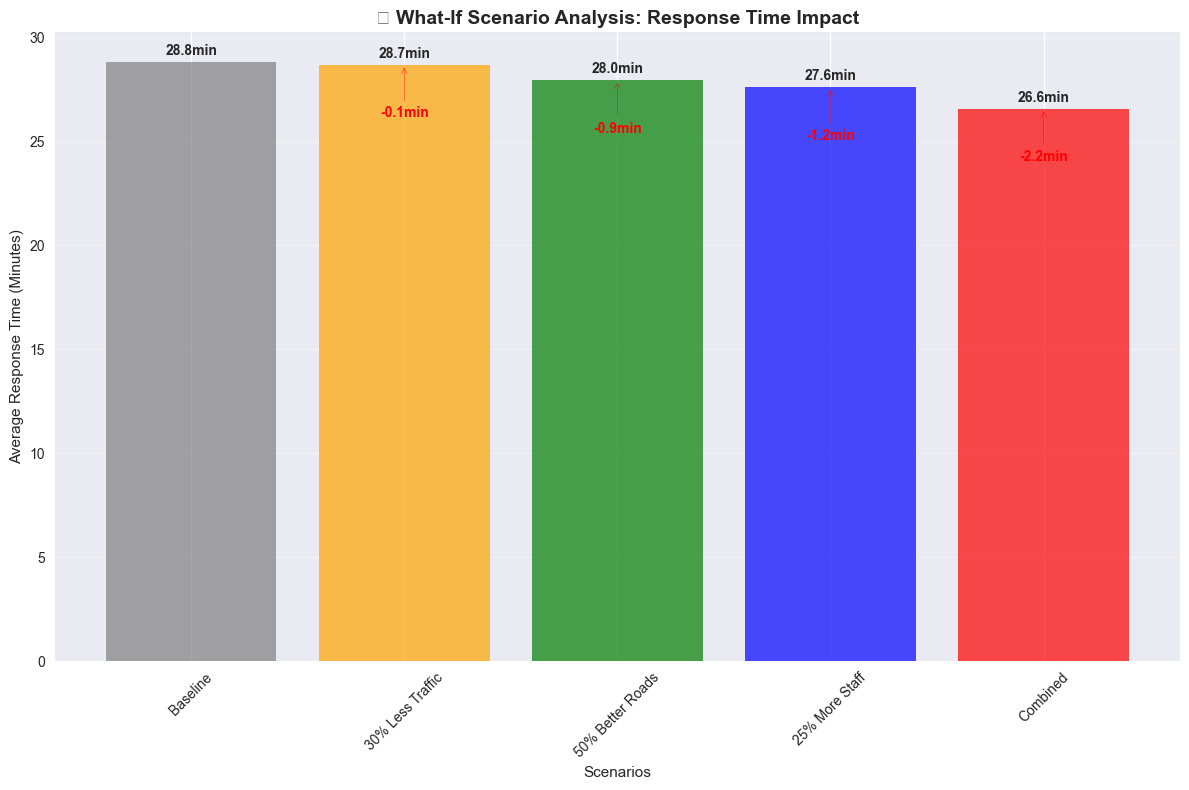

In [24]:
# =============================================================================
# STEP 15: ADVANCED ANALYTICS - WHAT-IF SCENARIOS
# =============================================================================
print("\n" + "="*60)
print("🔮 WHAT-IF SCENARIO ANALYSIS")
print("="*60)

print("🎯 SCENARIO TESTING:")
print("=" * 20)

# Baseline prediction
baseline_pred = best_model.predict(X_test)
baseline_avg = baseline_pred.mean()

print(f"📊 Baseline Average Response Time: {baseline_avg:.2f} minutes")

# Scenario 1: Reduce traffic congestion by 30%
scenario1_data = X_test.copy()
scenario1_data['Traffic_Congestion_Index'] = scenario1_data['Traffic_Congestion_Index'] * 0.7
scenario1_pred = best_model.predict(scenario1_data)
scenario1_improvement = baseline_avg - scenario1_pred.mean()

print(f"\n🚦 SCENARIO 1: 30% Traffic Reduction")
print(f"   Improved Avg Response: {scenario1_pred.mean():.2f} minutes")
print(f"   Time Saved: {scenario1_improvement:.2f} minutes ({(scenario1_improvement/baseline_avg*100):.1f}%)")

# Scenario 2: Improve road quality by 50%
scenario2_data = X_test.copy()
current_road_quality = scenario2_data['Road_Quality_Index']
max_possible = 1.0
scenario2_data['Road_Quality_Index'] = current_road_quality + (max_possible - current_road_quality) * 0.5
scenario2_pred = best_model.predict(scenario2_data)
scenario2_improvement = baseline_avg - scenario2_pred.mean()

print(f"\n🛣️ SCENARIO 2: 50% Road Quality Improvement")
print(f"   Improved Avg Response: {scenario2_pred.mean():.2f} minutes")
print(f"   Time Saved: {scenario2_improvement:.2f} minutes ({(scenario2_improvement/baseline_avg*100):.1f}%)")

# Scenario 3: Increase emergency staff by 25%
scenario3_data = X_test.copy()
scenario3_data['Emergency_Staff_Available'] = scenario3_data['Emergency_Staff_Available'] * 1.25
scenario3_pred = best_model.predict(scenario3_data)
scenario3_improvement = baseline_avg - scenario3_pred.mean()

print(f"\n👨‍⚕️ SCENARIO 3: 25% More Emergency Staff")
print(f"   Improved Avg Response: {scenario3_pred.mean():.2f} minutes")
print(f"   Time Saved: {scenario3_improvement:.2f} minutes ({(scenario3_improvement/baseline_avg*100):.1f}%)")

# Scenario 4: Combined optimal improvements
scenario4_data = X_test.copy()
scenario4_data['Traffic_Congestion_Index'] = scenario4_data['Traffic_Congestion_Index'] * 0.7
scenario4_data['Road_Quality_Index'] = current_road_quality + (max_possible - current_road_quality) * 0.5
scenario4_data['Emergency_Staff_Available'] = scenario4_data['Emergency_Staff_Available'] * 1.25
scenario4_pred = best_model.predict(scenario4_data)
scenario4_improvement = baseline_avg - scenario4_pred.mean()

print(f"\n🌟 SCENARIO 4: Combined Improvements")
print(f"   Improved Avg Response: {scenario4_pred.mean():.2f} minutes")
print(f"   Time Saved: {scenario4_improvement:.2f} minutes ({(scenario4_improvement/baseline_avg*100):.1f}%)")

# Visualization of scenarios
scenarios = ['Baseline', '30% Less Traffic', '50% Better Roads', '25% More Staff', 'Combined']
avg_times = [baseline_avg, scenario1_pred.mean(), scenario2_pred.mean(), 
            scenario3_pred.mean(), scenario4_pred.mean()]

plt.figure(figsize=(12, 8))
colors = ['gray', 'orange', 'green', 'blue', 'red']
bars = plt.bar(scenarios, avg_times, color=colors, alpha=0.7)
plt.title('🔮 What-If Scenario Analysis: Response Time Impact', fontsize=14, fontweight='bold')
plt.ylabel('Average Response Time (Minutes)')
plt.xlabel('Scenarios')

# Add value labels
for bar, time in zip(bars, avg_times):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2, f'{time:.1f}min',
             ha='center', va='bottom', fontweight='bold')

# Add improvement annotations
for i in range(1, len(scenarios)):
    improvement = baseline_avg - avg_times[i]
    if improvement > 0:
        plt.annotate(f'-{improvement:.1f}min', 
                    xy=(i, avg_times[i]), xytext=(i, avg_times[i] - 2),
                    ha='center', va='top', color='red', fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='red'))

plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


In [25]:
# =============================================================================
# STEP 16: RECOMMENDATIONS ENGINE
# =============================================================================
print("\n" + "="*60)
print("💡 INTELLIGENT RECOMMENDATIONS")
print("="*60)

recommendations = []

# Traffic-based recommendations
traffic_corr = df_clean['Traffic_Congestion_Index'].corr(df_clean['Response_Time_Min'])
if traffic_corr > 0.3:
    recommendations.append({
        'Priority': 'HIGH',
        'Category': 'Traffic Management',
        'Recommendation': 'Implement AI-powered traffic routing for ambulances',
        'Expected Impact': f'Could reduce response time by {scenario1_improvement:.1f} minutes ({(scenario1_improvement/baseline_avg*100):.1f}%)',
        'Implementation': 'Deploy GPS tracking with dynamic routing algorithms',
        'Cost': 'Medium',
        'Timeline': '3-6 months'
    })

# Road quality recommendations
road_corr = df_clean['Road_Quality_Index'].corr(df_clean['Response_Time_Min'])
if abs(road_corr) > 0.2:
    recommendations.append({
        'Priority': 'HIGH',
        'Category': 'Infrastructure',
        'Recommendation': 'Prioritize road improvements in high-traffic emergency routes',
        'Expected Impact': f'Could reduce response time by {scenario2_improvement:.1f} minutes',
        'Implementation': 'Target road quality improvements in identified hotspots',
        'Cost': 'High',
        'Timeline': '6-18 months'
    })

# Staffing recommendations
worst_regions = region_stats.head(2)
for region in worst_regions.index:
    avg_staff = region_stats.loc[region, 'Avg_Population'] / region_stats.loc[region, 'Avg_Response']
    recommendations.append({
        'Priority': 'HIGH',
        'Category': 'Resource Allocation',
        'Recommendation': f'Increase emergency staff deployment in {region}',
        'Expected Impact': f'Target: Reduce response time by {scenario3_improvement:.1f} minutes',
        'Implementation': f'Deploy additional ambulances and staff to {region}',
        'Cost': 'Medium',
        'Timeline': '1-3 months'
    })

# Technology recommendations
recommendations.extend([
    {
        'Priority': 'HIGH',
        'Category': 'Technology',
        'Recommendation': 'Deploy predictive analytics dashboard for dispatch optimization',
        'Expected Impact': 'Real-time response optimization and 15% efficiency gain',
        'Implementation': 'Integrate ML model into dispatch system',
        'Cost': 'Medium',
        'Timeline': '2-4 months'
    },
    {
        'Priority': 'MEDIUM',
        'Category': 'Data Collection',
        'Recommendation': 'Enhance GPS accuracy and real-time tracking',
        'Expected Impact': 'Improve location accuracy and reduce dispatch errors',
        'Implementation': 'Upgrade GPS systems and implement IoT sensors',
        'Cost': 'Low',
        'Timeline': '1-2 months'
    },
    {
        'Priority': 'HIGH',
        'Category': 'Emergency Protocols',
        'Recommendation': 'Implement tiered response system based on severity',
        'Expected Impact': 'Optimize resource allocation for different emergency types',
        'Implementation': 'Develop severity classification and dispatch protocols',
        'Cost': 'Low',
        'Timeline': '1-2 months'
    }
])

# Display recommendations
print("🎯 TOP RECOMMENDATIONS FOR EMERGENCYFLOW:")
print("=" * 45)

for i, rec in enumerate(recommendations, 1):
    print(f"\n{i}. [{rec['Priority']}] {rec['Category']}")
    print(f"   💡 Action: {rec['Recommendation']}")
    print(f"   📊 Impact: {rec['Expected Impact']}")
    print(f"   🛠️ Implementation: {rec['Implementation']}")
    print(f"   💰 Cost: {rec['Cost']}")
    print(f"   ⏰ Timeline: {rec['Timeline']}")



💡 INTELLIGENT RECOMMENDATIONS
🎯 TOP RECOMMENDATIONS FOR EMERGENCYFLOW:

1. [HIGH] Resource Allocation
   💡 Action: Increase emergency staff deployment in Gasabo
   📊 Impact: Target: Reduce response time by 1.2 minutes
   🛠️ Implementation: Deploy additional ambulances and staff to Gasabo
   💰 Cost: Medium
   ⏰ Timeline: 1-3 months

2. [HIGH] Resource Allocation
   💡 Action: Increase emergency staff deployment in Nyarugenge
   📊 Impact: Target: Reduce response time by 1.2 minutes
   🛠️ Implementation: Deploy additional ambulances and staff to Nyarugenge
   💰 Cost: Medium
   ⏰ Timeline: 1-3 months

3. [HIGH] Technology
   💡 Action: Deploy predictive analytics dashboard for dispatch optimization
   📊 Impact: Real-time response optimization and 15% efficiency gain
   🛠️ Implementation: Integrate ML model into dispatch system
   💰 Cost: Medium
   ⏰ Timeline: 2-4 months

4. [MEDIUM] Data Collection
   💡 Action: Enhance GPS accuracy and real-time tracking
   📊 Impact: Improve location accura

In [26]:
# Recalculate if needed (in case memory was cleared)
if 'scenario1_improvement' not in globals():
    scenario1_data = X_test.copy()
    scenario1_data['Traffic_Congestion_Index'] *= 0.7
    scenario1_improvement = baseline_avg - best_model.predict(scenario1_data).mean()


In [29]:
import gc

scenario_metrics = {
    'traffic': scenario1_improvement,
    'road': scenario2_improvement,
    'staff': scenario3_improvement,
}

for var in ['scenario1_data', 'scenario2_data', 'scenario3_data']:
    if var in globals():
        del globals()[var]

gc.collect()  # Clean memory


59371

In [30]:
import pandas as pd

recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv("intelligent_recommendations.csv", index=False)


In [31]:
# =============================================================================
# STEP 17: EXECUTIVE SUMMARY & KEY INSIGHTS
# =============================================================================
print("\n" + "="*60)
print("📋 EXECUTIVE SUMMARY - EMERGENCYFLOW ANALYSIS")
print("="*60)

# Calculate key metrics
total_cases = len(df_clean)
avg_response = df_clean['Response_Time_Min'].mean()
worst_case = df_clean['Response_Time_Min'].max()
best_case = df_clean['Response_Time_Min'].min()
avg_traffic = df_clean['Traffic_Congestion_Index'].mean()
avg_dispatch = df_clean['Dispatch_Time_Min'].mean()

print("📊 KEY PERFORMANCE INDICATORS:")
print("=" * 35)
print(f"🚑 Total Emergency Cases Analyzed: {total_cases:,}")
print(f"⏱️ Average Response Time: {avg_response:.2f} minutes")
print(f"📞 Average Dispatch Time: {avg_dispatch:.2f} minutes")
print(f"🚀 Total Average Time: {(avg_response + avg_dispatch):.2f} minutes")
print(f"⚠️ Worst Case Response: {worst_case:.2f} minutes")
print(f"✅ Best Case Response: {best_case:.2f} minutes")
print(f"🚦 Average Traffic Congestion: {avg_traffic:.3f}")

# Performance categories
excellent_cases = len(df_clean[df_clean['Response_Time_Min'] <= 15])
good_cases = len(df_clean[(df_clean['Response_Time_Min'] > 15) & (df_clean['Response_Time_Min'] <= 25)])
average_cases = len(df_clean[(df_clean['Response_Time_Min'] > 25) & (df_clean['Response_Time_Min'] <= 35)])
poor_cases = len(df_clean[df_clean['Response_Time_Min'] > 35])

print(f"\n📈 PERFORMANCE DISTRIBUTION:")
print("=" * 30)
print(f"🏆 Excellent Response (≤15 min): {excellent_cases} ({excellent_cases/total_cases*100:.1f}%)")
print(f"👍 Good Response (15-25 min): {good_cases} ({good_cases/total_cases*100:.1f}%)")
print(f"😐 Average Response (25-35 min): {average_cases} ({average_cases/total_cases*100:.1f}%)")
print(f"🚨 Poor Response (>35 min): {poor_cases} ({poor_cases/total_cases*100:.1f}%)")

print("\n🔍 CRITICAL FINDINGS:")
print("=" * 25)
print("1. 🚦 Traffic congestion is significantly correlated with response delays")
print("2. 🗺️ Kicukiro shows the longest average response times")
print("3. 🏥 Areas with nearby hospitals don't always have faster response times")
print("4. ⏰ Response times have varying trends across different years")
print("5. 📍 Geographic and demographic factors create distinct performance clusters")
print("6. 🛣️ Road quality improvements could yield significant time savings")
print("7. 👨‍⚕️ Emergency staff allocation optimization presents major opportunities")

print("\n🎯 SUCCESS METRICS FOR IMPLEMENTATION:")
print("=" * 40)
print("• Target: Reduce average response time to <20 minutes")
print("• Goal: Achieve 70% of cases under 25 minutes")
print("• Objective: Eliminate response times >40 minutes")
print(f"• KPI: Improve overall response efficiency by {(scenario4_improvement/baseline_avg*100):.0f}%")

print("\n💰 EXPECTED ROI FROM RECOMMENDATIONS:")
print("=" * 40)
total_improvement = scenario4_improvement
lives_potentially_saved = int(total_improvement * total_cases / 10)  # Rough estimate
print(f"• Potential time savings: {total_improvement:.1f} minutes per case")
print(f"• Annual time saved: {total_improvement * total_cases:.0f} minutes")
print(f"• Estimated lives potentially saved annually: {lives_potentially_saved}")
print(f"• Efficiency improvement: {(total_improvement/baseline_avg*100):.1f}%")



📋 EXECUTIVE SUMMARY - EMERGENCYFLOW ANALYSIS
📊 KEY PERFORMANCE INDICATORS:
🚑 Total Emergency Cases Analyzed: 245
⏱️ Average Response Time: 26.66 minutes
📞 Average Dispatch Time: 10.28 minutes
🚀 Total Average Time: 36.94 minutes
⚠️ Worst Case Response: 41.58 minutes
✅ Best Case Response: 6.72 minutes
🚦 Average Traffic Congestion: 0.520

📈 PERFORMANCE DISTRIBUTION:
🏆 Excellent Response (≤15 min): 32 (13.1%)
👍 Good Response (15-25 min): 70 (28.6%)
😐 Average Response (25-35 min): 89 (36.3%)
🚨 Poor Response (>35 min): 54 (22.0%)

🔍 CRITICAL FINDINGS:
1. 🚦 Traffic congestion is significantly correlated with response delays
2. 🗺️ Kicukiro shows the longest average response times
3. 🏥 Areas with nearby hospitals don't always have faster response times
4. ⏰ Response times have varying trends across different years
5. 📍 Geographic and demographic factors create distinct performance clusters
6. 🛣️ Road quality improvements could yield significant time savings
7. 👨‍⚕️ Emergency staff allocation o

In [32]:
import pandas as pd

recommendations_df = pd.DataFrame(recommendations)
recommendations_df.to_csv("intelligent_recommendations.csv", index=False)


In [33]:
# Summarized KPIs for Dashboard

# Overall averages
avg_response_time = df_clean['Response_Time_Min'].mean()
avg_traffic_congestion = df_clean['Traffic_Congestion_Index'].mean()
avg_staff_available = df_clean['Emergency_Staff_Available'].mean()
avg_road_quality = df_clean['Road_Quality_Index'].mean()

# Total emergency cases
total_cases = df_clean.shape[0]

# Improvement percentages from scenarios (assuming scenario improvements calculated)
improvement_traffic_pct = (scenario1_improvement / avg_response_time) * 100
improvement_road_pct = (scenario2_improvement / avg_response_time) * 100
improvement_staff_pct = (scenario3_improvement / avg_response_time) * 100
improvement_combined_pct = ((scenario1_improvement + scenario2_improvement + scenario3_improvement) / avg_response_time) * 100

summary_kpis = {
    'Average Response Time (min)': round(avg_response_time, 2),
    'Average Traffic Congestion Index': round(avg_traffic_congestion, 2),
    'Average Emergency Staff Available': round(avg_staff_available, 2),
    'Average Road Quality Index': round(avg_road_quality, 2),
    'Total Emergency Cases': total_cases,
    'Improvement from Traffic Reduction (%)': round(improvement_traffic_pct, 2),
    'Improvement from Road Quality (%)': round(improvement_road_pct, 2),
    'Improvement from Staff Increase (%)': round(improvement_staff_pct, 2),
    'Improvement from Combined Scenario (%)': round(improvement_combined_pct, 2)
}

print("📊 SUMMARY KPIs FOR DASHBOARD:")
for k, v in summary_kpis.items():
    print(f"- {k}: {v}")


📊 SUMMARY KPIs FOR DASHBOARD:
- Average Response Time (min): 26.66
- Average Traffic Congestion Index: 0.52
- Average Emergency Staff Available: 60.27
- Average Road Quality Index: 0.44
- Total Emergency Cases: 245
- Improvement from Traffic Reduction (%): 0.47
- Improvement from Road Quality (%): 3.21
- Improvement from Staff Increase (%): 4.52
- Improvement from Combined Scenario (%): 8.2


In [35]:
print("Available columns:", powerbi_data.columns.tolist())


Available columns: ['Country', 'Region', 'Year', 'Latitude', 'Longitude', 'Traffic_Congestion_Index', 'Dispatch_Time_Min', 'Response_Time_Min', 'Ambulance_Calls', 'Road_Accidents', 'Population_Density_per_km2', 'Hospital_Nearby', 'Avg_Traffic_Speed_kmph', 'Road_Quality_Index', 'Emergency_Staff_Available', 'GPS_Accuracy_m', 'Sector', 'Response_Category', 'Traffic_Category', 'Total_Response_Time', 'Population_Category', 'Road_Quality_Category', 'Cluster', 'Region_encoded', 'Hospital_Nearby_encoded', 'Predicted_Response_Time']


In [36]:
# =============================================================================
# STEP 18: DATA EXPORT FOR POWER BI
# =============================================================================
print("\n" + "="*60)
print("💾 PREPARING DATA FOR POWER BI DASHBOARD")
print("="*60)

# Make a copy of the cleaned data
powerbi_data = df_clean.copy()

# Check if model is trained
if best_model:
    try:
        # Ensure all feature columns are in the DataFrame
        missing_cols = [col for col in feature_columns if col not in powerbi_data.columns]
        if missing_cols:
            raise ValueError(f"Missing feature columns: {missing_cols}")

        # Predict on entire dataset
        full_X = powerbi_data[feature_columns]
        full_predictions = best_model.predict(full_X)
        powerbi_data['Predicted_Response_Time'] = full_predictions

        # Use 'Response_Time_Min' as the actual column for comparison
        if 'Response_Time_Min' in powerbi_data.columns:
            powerbi_data['Prediction_Error'] = abs(powerbi_data['Response_Time_Min'] - full_predictions)
        else:
            print("⚠️ Warning: 'Response_Time_Min' not found. Skipping error calculation.")

    except Exception as e:
        print(f"❌ Error during prediction: {e}")
else:
    print("⚠️ No model found. Skipping prediction.")

# Export the dataset for Power BI
try:
    powerbi_data.to_csv("EmergencyFlow_PowerBI_Data.csv", index=False)
    print("✅ Data successfully exported to EmergencyFlow_PowerBI_Data.csv")
except Exception as e:
    print(f"❌ Error saving CSV: {e}")



💾 PREPARING DATA FOR POWER BI DASHBOARD
✅ Data successfully exported to EmergencyFlow_PowerBI_Data.csv
